# <center>        **Introduction to Data Science (S2-22_DSECLZG532)-ASSIGNMENT**</center>

## Group No
    151
## Group Member Names:
1. Rahul Rohilla   -  2022dc04425
2. Kovvuri Satyanarayana Reddy   -   2022dc04282
3. Kovvuri Narendra Reddy   -   2022dc04283

# 1. Business Understanding

Students are expected to identify an analytical problem of your choice. You have to detail the Business Understanding part of your problem under this heading which basically addresses the following questions.

   1. What is the business problem that you are trying to solve?
   2. What data do you need to answer the above problem?
   3. What are the different sources of data?
   4. What kind of analytics task are you performing?

Score: 1 Mark in total (0.25 mark each)

1. What is the business problem that you are trying to solve?

   - The business problem we aim to address is vehicle loan default prediction. Specifically, we want to use available data on loan applicants to predict whether they are likely to default on their vehicle loans. This prediction is valuable to lenders as it helps them identify potential loan defaulters in advance, allowing them to make more informed lending decisions and reduce financial risks.

2. What data do you need to answer the above problem?

   - To address this problem effectively, we require the following data:
     - Customer Information: Data on loan applicants, including their demographics, employment history, and other relevant personal information.
     - Loan Repayment History: Historical data on loan repayment behavior, including whether the applicant defaulted on previous loans or successfully repaid them.
     - Loan Details: Information about the vehicle loan itself, such as loan amount and loan term.
     - Any additional relevant features that might impact loan repayment behavior, such as credit scores or economic indicators.

3. What are the different sources of data?

   - The data sources for this problem may include:
     - Loan application forms and customer databases maintained by the lending institutions and financial institutions.
     - Historical loan repayment records and credit reports.
     - External sources of economic data and credit scoring information.
     - Government or regulatory databases that may contain relevant information on applicants' financial history.

   - Combining data from these sources can provide a comprehensive view of each loan applicant's background and their likelihood of defaulting on a vehicle loan.

4. What kind of analytics task are you performing?

   - We are conducting a Classification task. Specifically, we are building a predictive model to classify loan applicants into one of two categories: those likely to default on their vehicle loans and those not likely to default. This classification task will involve the use of machine learning algorithms and statistical techniques to analyze historical data and make predictions based on features related to the loan applicants' characteristics and repayment history.

   - The outcome of this classification will assist the lending institution in making more informed decisions regarding whether to approve or reject loan applications, helping to mitigate financial risks associated with loan defaults.

# 2. Data Acquisition

For the problem identified , find an appropriate data set (Your data set must
be unique with minimum **20 features and 10k rows**) from any public data source.

---



## 2.1 Download the data directly



In [1]:
##---------Type the code below this line------------------##
# We can use our own kaggle username and Token to download the data directly from kaggle.

import os
os.environ['KAGGLE_USERNAME'] = 'satya4093'
os.environ['KAGGLE_KEY'] = '438ea75c9aafb10f66e66980c7078497'

from zipfile import ZipFile
from kaggle.api.kaggle_api_extended import KaggleApi

# Instantiate the Kaggle API
api = KaggleApi()
api.authenticate()

dataset_name = 'avikpaul4u/vehicle-loan-default-prediction'

# Download the dataset
api.dataset_download_files(dataset_name, path="datasets/", unzip=True)

download_dir = "datasets"
print(f"Dataset '{dataset_name}' downloaded and extracted to '{download_dir}'.")


Dataset 'avikpaul4u/vehicle-loan-default-prediction' downloaded and extracted to 'datasets'.


## 2.2 Code for converting the above downloaded data into a dataframe

In [2]:
##---------Type the code below this line------------------##
# When we load the csv data from the disk pandas will automatically convert it into pandas dataframe.
import pandas as pd
df = pd.read_csv("./datasets/train.csv")

## 2.3 Confirm the data has been correctly by displaying the first 5 and last 5 records.

In [3]:
##---------Type the code below this line------------------##
df.head()

,UNIQUEID,DISBURSED_AMOUNT,ASSET_COST,LTV,BRANCH_ID,SUPPLIER_ID,MANUFACTURER_ID,CURRENT_PINCODE_ID,DATE_OF_BIRTH,EMPLOYMENT_TYPE,...,SEC_SANCTIONED_AMOUNT,SEC_DISBURSED_AMOUNT,PRIMARY_INSTAL_AMT,SEC_INSTAL_AMT,NEW_ACCTS_IN_LAST_SIX_MONTHS,DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS,AVERAGE_ACCT_AGE,CREDIT_HISTORY_LENGTH,NO_OF_INQUIRIES,LOAN_DEFAULT
0,420825,50578,58400,89.55,67,22807,45,1441,01-01-1984,Salaried,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
1,537409,47145,65550,73.23,67,22807,45,1502,31-07-1985,Self employed,...,0,0,1991,0,0,1,1yrs 11mon,1yrs 11mon,0,1
2,417566,53278,61360,89.63,67,22807,45,1497,24-08-1985,Self employed,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
3,624493,57513,66113,88.48,67,22807,45,1501,30-12-1993,Self employed,...,0,0,31,0,0,0,0yrs 8mon,1yrs 3mon,1,1
4,539055,52378,60300,88.39,67,22807,45,1495,09-12-1977,Self employed,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,1,1


In [4]:
df.tail()

,UNIQUEID,DISBURSED_AMOUNT,ASSET_COST,LTV,BRANCH_ID,SUPPLIER_ID,MANUFACTURER_ID,CURRENT_PINCODE_ID,DATE_OF_BIRTH,EMPLOYMENT_TYPE,...,SEC_SANCTIONED_AMOUNT,SEC_DISBURSED_AMOUNT,PRIMARY_INSTAL_AMT,SEC_INSTAL_AMT,NEW_ACCTS_IN_LAST_SIX_MONTHS,DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS,AVERAGE_ACCT_AGE,CREDIT_HISTORY_LENGTH,NO_OF_INQUIRIES,LOAN_DEFAULT
233149,626432,63213,105405,60.72,34,20700,48,1050,01-08-1988,Salaried,...,0,0,4084,0,0,0,1yrs 9mon,3yrs 3mon,0,0
233150,606141,73651,100600,74.95,34,23775,51,990,05-12-1988,Self employed,...,0,0,1565,0,0,0,0yrs 6mon,0yrs 6mon,0,0
233151,613658,33484,71212,48.45,77,22186,86,2299,01-06-1976,Salaried,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
233152,548084,34259,73286,49.10,77,22186,86,2299,26-03-1994,Salaried,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
233153,630213,75751,116009,66.81,77,22186,86,2299,18-02-1984,Salaried,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0


## 2.4 Display the column headings, statistical information, description and statistical summary of the data.

In [5]:
##---------Type the code below this line------------------##
df.columns

Index(['UNIQUEID', 'DISBURSED_AMOUNT', 'ASSET_COST', 'LTV', 'BRANCH_ID',
       'SUPPLIER_ID', 'MANUFACTURER_ID', 'CURRENT_PINCODE_ID', 'DATE_OF_BIRTH',
       'EMPLOYMENT_TYPE', 'DISBURSAL_DATE', 'STATE_ID', 'EMPLOYEE_CODE_ID',
       'MOBILENO_AVL_FLAG', 'AADHAR_FLAG', 'PAN_FLAG', 'VOTERID_FLAG',
       'DRIVING_FLAG', 'PASSPORT_FLAG', 'PERFORM_CNS_SCORE',
       'PERFORM_CNS_SCORE_DESCRIPTION', 'PRI_NO_OF_ACCTS', 'PRI_ACTIVE_ACCTS',
       'PRI_OVERDUE_ACCTS', 'PRI_CURRENT_BALANCE', 'PRI_SANCTIONED_AMOUNT',
       'PRI_DISBURSED_AMOUNT', 'SEC_NO_OF_ACCTS', 'SEC_ACTIVE_ACCTS',
       'SEC_OVERDUE_ACCTS', 'SEC_CURRENT_BALANCE', 'SEC_SANCTIONED_AMOUNT',
       'SEC_DISBURSED_AMOUNT', 'PRIMARY_INSTAL_AMT', 'SEC_INSTAL_AMT',
       'NEW_ACCTS_IN_LAST_SIX_MONTHS', 'DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS',
       'AVERAGE_ACCT_AGE', 'CREDIT_HISTORY_LENGTH', 'NO_OF_INQUIRIES',
       'LOAN_DEFAULT'],
      dtype='object')

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
UNIQUEID,233154.0,535917.573376,6.831569e+04,417428.00,476786.25,535978.5,595039.75,6.710840e+05
DISBURSED_AMOUNT,233154.0,54356.993528,1.297131e+04,13320.00,47145.00,53803.0,60413.00,9.905720e+05
ASSET_COST,233154.0,75865.068144,1.894478e+04,37000.00,65717.00,70946.0,79201.75,1.628992e+06
LTV,233154.0,74.746530,1.145664e+01,10.03,68.88,76.8,83.67,9.500000e+01
BRANCH_ID,233154.0,72.936094,6.983499e+01,1.00,14.00,61.0,130.00,2.610000e+02
SUPPLIER_ID,233154.0,19638.635035,3.491950e+03,10524.00,16535.00,20333.0,23000.00,2.480300e+04
MANUFACTURER_ID,233154.0,69.028054,2.214130e+01,45.00,48.00,86.0,86.00,1.560000e+02
CURRENT_PINCODE_ID,233154.0,3396.880247,2.238148e+03,1.00,1511.00,2970.0,5677.00,7.345000e+03
STATE_ID,233154.0,7.262243,4.482230e+00,1.00,4.00,6.0,10.00,2.200000e+01
EMPLOYEE_CODE_ID,233154.0,1549.477148,9.752613e+02,1.00,713.00,1451.0,2362.00,3.795000e+03


## 2.5 Write your observations from the above.
1. Size of the dataset
2. What type of data attributes are there?
3. Is there any null data that has to be cleaned?

Score: 2 Marks in total (0.25 marks for 2.1, 0.25 marks for 2.2, 0.5 marks for 2.3, 0.25 marks for 2.4, 0.75 marks for 2.5)

In [7]:
# Size of the dataset is 233154 rows and 41 columns.
df.shape

(233154, 41)

In [8]:
df.columns

Index(['UNIQUEID', 'DISBURSED_AMOUNT', 'ASSET_COST', 'LTV', 'BRANCH_ID',
       'SUPPLIER_ID', 'MANUFACTURER_ID', 'CURRENT_PINCODE_ID', 'DATE_OF_BIRTH',
       'EMPLOYMENT_TYPE', 'DISBURSAL_DATE', 'STATE_ID', 'EMPLOYEE_CODE_ID',
       'MOBILENO_AVL_FLAG', 'AADHAR_FLAG', 'PAN_FLAG', 'VOTERID_FLAG',
       'DRIVING_FLAG', 'PASSPORT_FLAG', 'PERFORM_CNS_SCORE',
       'PERFORM_CNS_SCORE_DESCRIPTION', 'PRI_NO_OF_ACCTS', 'PRI_ACTIVE_ACCTS',
       'PRI_OVERDUE_ACCTS', 'PRI_CURRENT_BALANCE', 'PRI_SANCTIONED_AMOUNT',
       'PRI_DISBURSED_AMOUNT', 'SEC_NO_OF_ACCTS', 'SEC_ACTIVE_ACCTS',
       'SEC_OVERDUE_ACCTS', 'SEC_CURRENT_BALANCE', 'SEC_SANCTIONED_AMOUNT',
       'SEC_DISBURSED_AMOUNT', 'PRIMARY_INSTAL_AMT', 'SEC_INSTAL_AMT',
       'NEW_ACCTS_IN_LAST_SIX_MONTHS', 'DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS',
       'AVERAGE_ACCT_AGE', 'CREDIT_HISTORY_LENGTH', 'NO_OF_INQUIRIES',
       'LOAN_DEFAULT'],
      dtype='object')

**We are defining type of each attribute.**

UNIQUEID                               Nominal

DISBURSED_AMOUNT                       Ratio

ASSET_COST                             Ratio

LTV                                    Ratio

BRANCH_ID                              Nominal

SUPPLIER_ID                            Nominal

MANUFACTURER_ID                        Nominal

CURRENT_PINCODE_ID                     Nominal

DATE_OF_BIRTH                          Interval

EMPLOYMENT_TYPE                        Nominal

DISBURSAL_DATE                         Interval

STATE_ID                               Nominal

EMPLOYEE_CODE_ID                       Nominal

MOBILENO_AVL_FLAG                      Nominal

AADHAR_FLAG                            Nominal

PAN_FLAG                               Nominal

VOTERID_FLAG                           Nominal

DRIVING_FLAG                           Nominal

PASSPORT_FLAG                          Nominal

PERFORM_CNS_SCORE                      Ratio

PERFORM_CNS_SCORE_DESCRIPTION          Ordinal

PRI_NO_OF_ACCTS                        Interval

PRI_ACTIVE_ACCTS                       Interval

PRI_OVERDUE_ACCTS                      Interval

PRI_CURRENT_BALANCE                    Ratio

PRI_SANCTIONED_AMOUNT                  Ratio

PRI_DISBURSED_AMOUNT                   Ratio

SEC_NO_OF_ACCTS                        Interval

SEC_ACTIVE_ACCTS                       Interval

SEC_OVERDUE_ACCTS                      Interval

SEC_CURRENT_BALANCE                    Ratio

SEC_SANCTIONED_AMOUNT                  Ratio

SEC_DISBURSED_AMOUNT                   Ratio

PRIMARY_INSTAL_AMT                     Ratio

SEC_INSTAL_AMT                         Ratio

NEW_ACCTS_IN_LAST_SIX_MONTHS           Interval

DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS    Interval

NO_OF_INQUIRIES                        Interval

LOAN_DEFAULT                           Nominal

In [9]:
# What type of data attributes are there?
df.dtypes

UNIQUEID                                 int64
DISBURSED_AMOUNT                         int64
ASSET_COST                               int64
LTV                                    float64
BRANCH_ID                                int64
SUPPLIER_ID                              int64
MANUFACTURER_ID                          int64
CURRENT_PINCODE_ID                       int64
DATE_OF_BIRTH                           object
EMPLOYMENT_TYPE                         object
DISBURSAL_DATE                          object
STATE_ID                                 int64
EMPLOYEE_CODE_ID                         int64
MOBILENO_AVL_FLAG                        int64
AADHAR_FLAG                              int64
PAN_FLAG                                 int64
VOTERID_FLAG                             int64
DRIVING_FLAG                             int64
PASSPORT_FLAG                            int64
PERFORM_CNS_SCORE                        int64
PERFORM_CNS_SCORE_DESCRIPTION           object
PRI_NO_OF_ACC

In [10]:
# Is there any null data that has to be cleaned?
# Only EMPLOYMENT_TYPEe has null values. We will clean it in data preparation steps.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233154 entries, 0 to 233153
Data columns (total 41 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   UNIQUEID                             233154 non-null  int64  
 1   DISBURSED_AMOUNT                     233154 non-null  int64  
 2   ASSET_COST                           233154 non-null  int64  
 3   LTV                                  233154 non-null  float64
 4   BRANCH_ID                            233154 non-null  int64  
 5   SUPPLIER_ID                          233154 non-null  int64  
 6   MANUFACTURER_ID                      233154 non-null  int64  
 7   CURRENT_PINCODE_ID                   233154 non-null  int64  
 8   DATE_OF_BIRTH                        233154 non-null  object 
 9   EMPLOYMENT_TYPE                      225493 non-null  object 
 10  DISBURSAL_DATE                       233154 non-null  object 
 11  STATE_ID     

# 3. Data Preparation

If input data is numerical or categorical, do 3.1, 3.2 and 3.4

If input data is text, do 3.3 and 3.4

In [11]:
#The input data is either numerical or categorical and we shall perform 3.1, 3.2, 3.4

## 3.1 Check for

* duplicate data
* missing data
* data inconsistencies


In [12]:
##---------Type the code below this line------------------##

In [13]:
# No duplicate data
df[df.duplicated()]

,UNIQUEID,DISBURSED_AMOUNT,ASSET_COST,LTV,BRANCH_ID,SUPPLIER_ID,MANUFACTURER_ID,CURRENT_PINCODE_ID,DATE_OF_BIRTH,EMPLOYMENT_TYPE,...,SEC_SANCTIONED_AMOUNT,SEC_DISBURSED_AMOUNT,PRIMARY_INSTAL_AMT,SEC_INSTAL_AMT,NEW_ACCTS_IN_LAST_SIX_MONTHS,DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS,AVERAGE_ACCT_AGE,CREDIT_HISTORY_LENGTH,NO_OF_INQUIRIES,LOAN_DEFAULT


In [14]:
# missing data
# only EMPLOYMENT_TYPE has null values, we shall handle those in later.
df[df.isna().any(axis=1)]

,UNIQUEID,DISBURSED_AMOUNT,ASSET_COST,LTV,BRANCH_ID,SUPPLIER_ID,MANUFACTURER_ID,CURRENT_PINCODE_ID,DATE_OF_BIRTH,EMPLOYMENT_TYPE,...,SEC_SANCTIONED_AMOUNT,SEC_DISBURSED_AMOUNT,PRIMARY_INSTAL_AMT,SEC_INSTAL_AMT,NEW_ACCTS_IN_LAST_SIX_MONTHS,DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS,AVERAGE_ACCT_AGE,CREDIT_HISTORY_LENGTH,NO_OF_INQUIRIES,LOAN_DEFAULT
87,525234,52428,67405,81.60,78,17014,45,2099,05-08-1998,NaN,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
88,637252,51653,63896,86.08,78,17014,45,2079,24-02-1999,NaN,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
91,584433,49488,63306,83.72,78,17014,45,2069,27-11-1998,NaN,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
99,515149,40884,59313,70.81,78,17014,45,2099,24-02-1998,NaN,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
125,547112,49683,62577,83.10,78,17014,45,2099,01-01-1998,NaN,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
231722,494458,43272,59313,74.86,78,17014,45,2093,03-03-1998,NaN,...,0,0,1125,0,0,0,1yrs 10mon,1yrs 10mon,3,0
231737,419420,36750,62852,60.14,78,17014,45,2082,01-01-1998,NaN,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
231756,553774,50683,67746,79.71,78,16803,86,2055,16-08-1999,NaN,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
231767,594901,55728,74748,79.60,78,16803,86,2073,01-01-1999,NaN,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0


In [15]:
df['EMPLOYMENT_TYPE'].value_counts(dropna=False)

EMPLOYMENT_TYPE
Self employed    127635
Salaried          97858
NaN                7661
Name: count, dtype: int64

In [16]:
# data inconsistencies check.
df.describe()

,UNIQUEID,DISBURSED_AMOUNT,ASSET_COST,LTV,BRANCH_ID,SUPPLIER_ID,MANUFACTURER_ID,CURRENT_PINCODE_ID,STATE_ID,EMPLOYEE_CODE_ID,...,SEC_OVERDUE_ACCTS,SEC_CURRENT_BALANCE,SEC_SANCTIONED_AMOUNT,SEC_DISBURSED_AMOUNT,PRIMARY_INSTAL_AMT,SEC_INSTAL_AMT,NEW_ACCTS_IN_LAST_SIX_MONTHS,DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS,NO_OF_INQUIRIES,LOAN_DEFAULT
count,233154.000000,233154.000000,2.331540e+05,233154.000000,233154.000000,233154.000000,233154.000000,233154.000000,233154.000000,233154.000000,...,233154.000000,2.331540e+05,2.331540e+05,2.331540e+05,2.331540e+05,2.331540e+05,233154.000000,233154.000000,233154.000000,233154.000000
mean,535917.573376,54356.993528,7.586507e+04,74.746530,72.936094,19638.635035,69.028054,3396.880247,7.262243,1549.477148,...,0.007244,5.427793e+03,7.295923e+03,7.179998e+03,1.310548e+04,3.232684e+02,0.381833,0.097481,0.206615,0.217071
std,68315.693711,12971.314171,1.894478e+04,11.456636,69.834995,3491.949566,22.141304,2238.147502,4.482230,975.261278,...,0.111079,1.702370e+05,1.831560e+05,1.825925e+05,1.513679e+05,1.555369e+04,0.955107,0.384439,0.706498,0.412252
min,417428.000000,13320.000000,3.700000e+04,10.030000,1.000000,10524.000000,45.000000,1.000000,1.000000,1.000000,...,0.000000,-5.746470e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,476786.250000,47145.000000,6.571700e+04,68.880000,14.000000,16535.000000,48.000000,1511.000000,4.000000,713.000000,...,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000
50%,535978.500000,53803.000000,7.094600e+04,76.800000,61.000000,20333.000000,86.000000,2970.000000,6.000000,1451.000000,...,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000
75%,595039.750000,60413.000000,7.920175e+04,83.670000,130.000000,23000.000000,86.000000,5677.000000,10.000000,2362.000000,...,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,1.999000e+03,0.000000e+00,0.000000,0.000000,0.000000,0.000000
max,671084.000000,990572.000000,1.628992e+06,95.000000,261.000000,24803.000000,156.000000,7345.000000,22.000000,3795.000000,...,8.000000,3.603285e+07,3.000000e+07,3.000000e+07,2.564281e+07,4.170901e+06,35.000000,20.000000,36.000000,1.000000


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233154 entries, 0 to 233153
Data columns (total 41 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   UNIQUEID                             233154 non-null  int64  
 1   DISBURSED_AMOUNT                     233154 non-null  int64  
 2   ASSET_COST                           233154 non-null  int64  
 3   LTV                                  233154 non-null  float64
 4   BRANCH_ID                            233154 non-null  int64  
 5   SUPPLIER_ID                          233154 non-null  int64  
 6   MANUFACTURER_ID                      233154 non-null  int64  
 7   CURRENT_PINCODE_ID                   233154 non-null  int64  
 8   DATE_OF_BIRTH                        233154 non-null  object 
 9   EMPLOYMENT_TYPE                      225493 non-null  object 
 10  DISBURSAL_DATE                       233154 non-null  object 
 11  STATE_ID     

In [18]:
# DATE_OF_BIRTH is in object type, we need to convert into datetime. We will handle it in steps further.
df['DATE_OF_BIRTH']

0         01-01-1984
1         31-07-1985
2         24-08-1985
3         30-12-1993
4         09-12-1977
             ...    
233149    01-08-1988
233150    05-12-1988
233151    01-06-1976
233152    26-03-1994
233153    18-02-1984
Name: DATE_OF_BIRTH, Length: 233154, dtype: object

In [19]:
# DISBURSAL_DATE is in object type, we need to convert into datetime. We will handle it in steps further.
df['DISBURSAL_DATE']

0         03-08-2018
1         26-09-2018
2         01-08-2018
3         26-10-2018
4         26-09-2018
             ...    
233149    26-10-2018
233150    23-10-2018
233151    24-10-2018
233152    29-09-2018
233153    27-10-2018
Name: DISBURSAL_DATE, Length: 233154, dtype: object

In [20]:
# This should be String type and should not contain null values. We will handle it in steps further.
df['EMPLOYMENT_TYPE'].value_counts(dropna=False)

EMPLOYMENT_TYPE
Self employed    127635
Salaried          97858
NaN                7661
Name: count, dtype: int64

In [21]:
# PERFORM_CNS.SCORE.DESCRIPTION has data inconsistency.
# because we only neeed to have A - M values but we have "Not scored" values for many rows. We will handle it in steps further.
df['PERFORM_CNS_SCORE_DESCRIPTION'].value_counts(dropna=False).sort_index()

PERFORM_CNS_SCORE_DESCRIPTION
A-Very Low Risk                                             14124
B-Very Low Risk                                              9201
C-Very Low Risk                                             16045
D-Very Low Risk                                             11358
E-Low Risk                                                   5821
F-Low Risk                                                   8485
G-Low Risk                                                   3988
H-Medium Risk                                                6855
I-Medium Risk                                                5557
J-High Risk                                                  3748
K-High Risk                                                  8277
L-Very High Risk                                             1134
M-Very High Risk                                             8776
No Bureau History Available                                116950
Not Scored: More than 50 active Accounts found

In [22]:
# AVERAGE_ACCT_AGE
# Here AVERAGE_ACCT_AGE do not have a standard age format. But we have yrs and mon. So, we have data inconsistency. 
# We will handle it in steps further.
df['AVERAGE_ACCT_AGE']

0          0yrs 0mon
1         1yrs 11mon
2          0yrs 0mon
3          0yrs 8mon
4          0yrs 0mon
             ...    
233149     1yrs 9mon
233150     0yrs 6mon
233151     0yrs 0mon
233152     0yrs 0mon
233153     0yrs 0mon
Name: AVERAGE_ACCT_AGE, Length: 233154, dtype: object

In [23]:
# CREDIT_HISTORY_LENGTH
# Here CREDIT_HISTORY_LENGTH do not have a standard duration format. But we have yrs and mon. So, we have data inconsistency.
# We will handle it in steps further.
df['CREDIT_HISTORY_LENGTH']

0          0yrs 0mon
1         1yrs 11mon
2          0yrs 0mon
3          1yrs 3mon
4          0yrs 0mon
             ...    
233149     3yrs 3mon
233150     0yrs 6mon
233151     0yrs 0mon
233152     0yrs 0mon
233153     0yrs 0mon
Name: CREDIT_HISTORY_LENGTH, Length: 233154, dtype: object

## 3.2 Apply techiniques
* to remove duplicate data
* to impute or remove missing data
* to remove data inconsistencies


In [24]:
##---------Type the code below this line------------------##

In [25]:
# There are no duplicate records. no need to remove
df[df.duplicated()]

,UNIQUEID,DISBURSED_AMOUNT,ASSET_COST,LTV,BRANCH_ID,SUPPLIER_ID,MANUFACTURER_ID,CURRENT_PINCODE_ID,DATE_OF_BIRTH,EMPLOYMENT_TYPE,...,SEC_SANCTIONED_AMOUNT,SEC_DISBURSED_AMOUNT,PRIMARY_INSTAL_AMT,SEC_INSTAL_AMT,NEW_ACCTS_IN_LAST_SIX_MONTHS,DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS,AVERAGE_ACCT_AGE,CREDIT_HISTORY_LENGTH,NO_OF_INQUIRIES,LOAN_DEFAULT


In [26]:
# to impute or remove missing data
df['EMPLOYMENT_TYPE'].value_counts(dropna=False)

EMPLOYMENT_TYPE
Self employed    127635
Salaried          97858
NaN                7661
Name: count, dtype: int64

In [27]:
df.shape

(233154, 41)

In [28]:
# Removing missing data.
df.dropna(inplace=True)
df.reset_index(drop=True, inplace=True)

In [29]:
df.shape

(225493, 41)

In [30]:
df.isna().sum()

UNIQUEID                               0
DISBURSED_AMOUNT                       0
ASSET_COST                             0
LTV                                    0
BRANCH_ID                              0
SUPPLIER_ID                            0
MANUFACTURER_ID                        0
CURRENT_PINCODE_ID                     0
DATE_OF_BIRTH                          0
EMPLOYMENT_TYPE                        0
DISBURSAL_DATE                         0
STATE_ID                               0
EMPLOYEE_CODE_ID                       0
MOBILENO_AVL_FLAG                      0
AADHAR_FLAG                            0
PAN_FLAG                               0
VOTERID_FLAG                           0
DRIVING_FLAG                           0
PASSPORT_FLAG                          0
PERFORM_CNS_SCORE                      0
PERFORM_CNS_SCORE_DESCRIPTION          0
PRI_NO_OF_ACCTS                        0
PRI_ACTIVE_ACCTS                       0
PRI_OVERDUE_ACCTS                      0
PRI_CURRENT_BALA

In [31]:
df.dtypes

UNIQUEID                                 int64
DISBURSED_AMOUNT                         int64
ASSET_COST                               int64
LTV                                    float64
BRANCH_ID                                int64
SUPPLIER_ID                              int64
MANUFACTURER_ID                          int64
CURRENT_PINCODE_ID                       int64
DATE_OF_BIRTH                           object
EMPLOYMENT_TYPE                         object
DISBURSAL_DATE                          object
STATE_ID                                 int64
EMPLOYEE_CODE_ID                         int64
MOBILENO_AVL_FLAG                        int64
AADHAR_FLAG                              int64
PAN_FLAG                                 int64
VOTERID_FLAG                             int64
DRIVING_FLAG                             int64
PASSPORT_FLAG                            int64
PERFORM_CNS_SCORE                        int64
PERFORM_CNS_SCORE_DESCRIPTION           object
PRI_NO_OF_ACC

In [32]:
# data inconsistency.
# 'DATE_OF_BIRTH', 'DISBURSAL_DATE', 'PERFORM_CNS_SCORE_DESCRIPTION', 'AVERAGE_ACCT_AGE', 'CREDIT_HISTORY_LENGTH', 
# 'MobileNo_Avl_Flag'

In [33]:
# 'DATE_OF_BIRTH', 'DISBURSAL_DATE'
df['DATE_OF_BIRTH'] = pd.to_datetime(df['DATE_OF_BIRTH'], dayfirst=True)
df['DISBURSAL_DATE'] = pd.to_datetime(df['DISBURSAL_DATE'], dayfirst=True)

In [34]:
# PERFORM_CNS.SCORE.DESCRIPTION'
# we are going to drop this column because there is so much inconsistancy, 
# The PERFORM_CNS.SCORE.DESCRIPTION for 55% of data is missing. So, we are removing the column.
df.drop('PERFORM_CNS_SCORE_DESCRIPTION', axis=1, inplace=True)

In [35]:
# 'AVERAGE_ACCT_AGE' Here we are doing string processing to obtain no.of years.
df['AVERAGE_ACCT_AGE_DAYS'] = df['AVERAGE_ACCT_AGE'].apply(lambda x: int(x.split("yrs")[0]) + int(x.split("yrs")[1].split("mon")[0]) / 30)

In [36]:
# 'CREDIT_HISTORY_LENGTH' Here we are doing string processing to obtain no.of years.
df['CREDIT_HISTORY_LENGTH_DAYS'] = df['CREDIT_HISTORY_LENGTH'].apply(lambda x: int(x.split("yrs")[0]) + int(x.split("yrs")[1].split("mon")[0]) / 30)

In [37]:
# We dont need 'AVERAGE_ACCT_AGE','CREDIT_HISTORY_LENGTH' columns any more 
df.drop(['AVERAGE_ACCT_AGE','CREDIT_HISTORY_LENGTH'], axis=1, inplace=True)

In [38]:
# As we can see all the values of the this attribute are 1, it doesn't add any value. So, we can remove the attribute.
df['MOBILENO_AVL_FLAG'].value_counts()

MOBILENO_AVL_FLAG
1    225493
Name: count, dtype: int64

In [39]:
df.drop('MOBILENO_AVL_FLAG', axis=1, inplace=True)

In [40]:
# Age Column <- DisbursalDate - Date.of.Birth
# Creating a new attribute representing Age of the applicant at the time of taking loan in years.
df['AGE_AT_DISBURSAL'] = (df['DISBURSAL_DATE'] - df['DATE_OF_BIRTH']).dt.days / 365

In [41]:
# checking the newly created column AGE_AT_DISBURSAL
df['AGE_AT_DISBURSAL']

0         34.610959
1         33.178082
2         32.958904
3         24.838356
4         40.824658
            ...    
225488    30.254795
225489    29.901370
225490    42.424658
225491    24.528767
225492    34.712329
Name: AGE_AT_DISBURSAL, Length: 225493, dtype: float64

In [42]:
# Checking if AGE_AT_DISBURSAL contains negative values.
df[df["AGE_AT_DISBURSAL"]<0][['DISBURSAL_DATE', 'DATE_OF_BIRTH']]

,DISBURSAL_DATE,DATE_OF_BIRTH


In [43]:
# We dont need 'DISBURSAL_DATE','DATE_OF_BIRTH' columns any more 
df.drop(['DISBURSAL_DATE', 'DATE_OF_BIRTH'], axis=1, inplace=True)

In [44]:
# UNIQUEID is not usefull in modelling. so we remove that column.
df.drop(['UNIQUEID'], axis=1, inplace=True)

## 3.3 Encode categorical data

In [45]:
##---------Type the code below this line------------------##

# Categorical columns are Employment.Type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 225493 entries, 0 to 225492
Data columns (total 37 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   DISBURSED_AMOUNT                     225493 non-null  int64  
 1   ASSET_COST                           225493 non-null  int64  
 2   LTV                                  225493 non-null  float64
 3   BRANCH_ID                            225493 non-null  int64  
 4   SUPPLIER_ID                          225493 non-null  int64  
 5   MANUFACTURER_ID                      225493 non-null  int64  
 6   CURRENT_PINCODE_ID                   225493 non-null  int64  
 7   EMPLOYMENT_TYPE                      225493 non-null  object 
 8   STATE_ID                             225493 non-null  int64  
 9   EMPLOYEE_CODE_ID                     225493 non-null  int64  
 10  AADHAR_FLAG                          225493 non-null  int64  
 11  PAN_FLAG     

In [46]:
# Self employed, Salaried values will be convted to 0's or 1's
# if it is Self employed -> 1
# if it is Salaried -> 0
df.EMPLOYMENT_TYPE.value_counts()

EMPLOYMENT_TYPE
Self employed    127635
Salaried          97858
Name: count, dtype: int64

In [47]:
df = pd.get_dummies(df, columns=['EMPLOYMENT_TYPE'], prefix=['EMPLOYMENT_TYPE'], drop_first=True, dtype=int)
df

,DISBURSED_AMOUNT,ASSET_COST,LTV,BRANCH_ID,SUPPLIER_ID,MANUFACTURER_ID,CURRENT_PINCODE_ID,STATE_ID,EMPLOYEE_CODE_ID,AADHAR_FLAG,...,PRIMARY_INSTAL_AMT,SEC_INSTAL_AMT,NEW_ACCTS_IN_LAST_SIX_MONTHS,DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS,NO_OF_INQUIRIES,LOAN_DEFAULT,AVERAGE_ACCT_AGE_DAYS,CREDIT_HISTORY_LENGTH_DAYS,AGE_AT_DISBURSAL,EMPLOYMENT_TYPE_Self employed
0,50578,58400,89.55,67,22807,45,1441,6,1998,1,...,0,0,0,0,0,0,0.000000,0.000000,34.610959,0
1,47145,65550,73.23,67,22807,45,1502,6,1998,1,...,1991,0,0,1,0,1,1.366667,1.366667,33.178082,1
2,53278,61360,89.63,67,22807,45,1497,6,1998,1,...,0,0,0,0,0,0,0.000000,0.000000,32.958904,1
3,57513,66113,88.48,67,22807,45,1501,6,1998,1,...,31,0,0,0,1,1,0.266667,1.100000,24.838356,1
4,52378,60300,88.39,67,22807,45,1495,6,1998,1,...,0,0,0,0,1,1,0.000000,0.000000,40.824658,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
225488,63213,105405,60.72,34,20700,48,1050,6,3705,0,...,4084,0,0,0,0,0,1.300000,3.100000,30.254795,0
225489,73651,100600,74.95,34,23775,51,990,6,3705,0,...,1565,0,0,0,0,0,0.200000,0.200000,29.901370,1
225490,33484,71212,48.45,77,22186,86,2299,4,3479,1,...,0,0,0,0,0,0,0.000000,0.000000,42.424658,0
225491,34259,73286,49.10,77,22186,86,2299,4,3479,1,...,0,0,0,0,0,0,0.000000,0.000000,24.528767,0


In [48]:
# 'branch_id' -> 82
# 'supplier_id' -> 2945 
# 'manufacturer_id' -> 11
# 'Current_pincode_ID' -> 6659
# 'State_ID' -> 22
# 'Employee_code_ID' -> 3269

In [49]:
# These attributes are categorical, but as they are already encoded we are leaving them as it is.

In [50]:
print("BRANCH_ID:", df['BRANCH_ID'].nunique())
print("SUPPLIER_ID", df['SUPPLIER_ID'].nunique())
print("MANUFACTURER_ID", df['MANUFACTURER_ID'].nunique())
print("CURRENT_PINCODE_ID", df['CURRENT_PINCODE_ID'].nunique())
print("STATE_ID", df['STATE_ID'].nunique())
print("EMPLOYEE_CODE_ID:", df['EMPLOYEE_CODE_ID'].nunique())

BRANCH_ID: 82
SUPPLIER_ID 2945
MANUFACTURER_ID 11
CURRENT_PINCODE_ID 6659
STATE_ID 22
EMPLOYEE_CODE_ID: 3269


## 3.4 Text data

1. Remove special characters
2. Change the case (up-casing and down-casing).
3. Tokenization — process of discretizing words within a document.
4. Filter Stop Words.

In [46]:
##---------Type the code below this line------------------##

In [47]:
##---------Type the code below this line------------------##

## 3.4 Report

Mention and justify the method adopted
* to remove duplicate data, if present
* to impute or remove missing data, if present
* to remove data inconsistencies, if present

OR for textdata
* How many tokens after step 3?
* how may tokens after stop words filtering?

If the any of the above are not present, then also add in the report below.

Score: 2 Marks (based on the dataset you have, the data prepreation you had to do and report typed, marks will be distributed between 3.1, 3.2, 3.3 and 3.4)

In [48]:
##---------Type the code below this line------------------##

In the provided dataset, we conducted various data preprocessing steps, and here's a summary of those actions:

1. Handling Duplicate Data:
   - We observed that there were no duplicate records in the dataset. Therefore, there was no need to perform any steps to remove duplicate data.

2. Handling Missing Values:
   - In the dataset, the only attribute with missing values was EMPLOYMENT_TYPE, which had approximately 3% missing values. We decided to remove rows with missing values in this column, as the dataset was sufficiently large, and a 3% loss was deemed acceptable.

3. Data Type Conversion:
   - We made data type conversions for certain attributes:
     a. Converted DATE_OF_BIRTH and DISBURSAL_DATE from object type to datetime type for more accurate date calculations.
     b. We created new attributes, AGE_AT_DISBURSAL, which represents the age of the borrower at the time of loan disbursement. This new attribute was derived from DATE_OF_BIRTH and DISBURSAL_DATE.

4. Handling Missing Information:
   - For the column PERFORM_CNS_SCORE_DESCRIPTION, which had missing values replaced with text that couldn't be identified using the isna function, we chose to remove this column from the dataset as it couldn't provide meaningful information.

5. Feature Engineering:
   - We performed feature engineering to create two new attributes:
     a. AVERAGE_ACCT_AGE_DAYS, derived from AVERAGE_ACCT_AGE, representing the average account age in days. We then removed the original attribute.
     b. CREDIT_HISTORY_LENGTH_DAYS, derived from CREDIT_HISTORY_LENGTH, representing the credit history length in days. We then removed the original attribute.

6. Removing Uninformative Columns:
   - We identified the MOBILENO_AVL_FLAG attribute, which had the same value ("1") for all records. As this attribute will not provide any valuable information for modeling, we removed it from the dataset.

7. Data Consistency Check:
   - To ensure data consistency, we checked the AGE_AT_DISBURSAL attribute to confirm that it did not contain any negative values. Negative values would indicate a data inconsistency issue, such as loan disbursement occurring before the borrower's birthdate.

8. Removing Unnecessary Columns:
   - The UNIQUEID column was removed from the dataset as it did not contribute any meaningful information for modeling purposes.

These data preprocessing steps were designed to clean and structure the dataset for subsequent modeling and analysis, ensuring that the data used for predictive modeling is accurate and relevant.

In [51]:
##---------Type the code below this line------------------##

## 3.5 Identify the target variables.

* Separate the data from the target such that the dataset is in the form of (X,y) or (Features, Label)

* Discretize / Encode the target variable or perform one-hot encoding on the target or any other as and if required.

* Report the observations

Score: 1 Mark

In [52]:
##---------Type the code below this line------------------##
df.columns

Index(['DISBURSED_AMOUNT', 'ASSET_COST', 'LTV', 'BRANCH_ID', 'SUPPLIER_ID',
       'MANUFACTURER_ID', 'CURRENT_PINCODE_ID', 'STATE_ID', 'EMPLOYEE_CODE_ID',
       'AADHAR_FLAG', 'PAN_FLAG', 'VOTERID_FLAG', 'DRIVING_FLAG',
       'PASSPORT_FLAG', 'PERFORM_CNS_SCORE', 'PRI_NO_OF_ACCTS',
       'PRI_ACTIVE_ACCTS', 'PRI_OVERDUE_ACCTS', 'PRI_CURRENT_BALANCE',
       'PRI_SANCTIONED_AMOUNT', 'PRI_DISBURSED_AMOUNT', 'SEC_NO_OF_ACCTS',
       'SEC_ACTIVE_ACCTS', 'SEC_OVERDUE_ACCTS', 'SEC_CURRENT_BALANCE',
       'SEC_SANCTIONED_AMOUNT', 'SEC_DISBURSED_AMOUNT', 'PRIMARY_INSTAL_AMT',
       'SEC_INSTAL_AMT', 'NEW_ACCTS_IN_LAST_SIX_MONTHS',
       'DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS', 'NO_OF_INQUIRIES',
       'LOAN_DEFAULT', 'AVERAGE_ACCT_AGE_DAYS', 'CREDIT_HISTORY_LENGTH_DAYS',
       'AGE_AT_DISBURSAL', 'EMPLOYMENT_TYPE_Self employed'],
      dtype='object')

In [53]:
columns_req = ['DISBURSED_AMOUNT', 'ASSET_COST', 'LTV', 'BRANCH_ID', 'SUPPLIER_ID',
               'MANUFACTURER_ID', 'CURRENT_PINCODE_ID', 'STATE_ID', 'EMPLOYEE_CODE_ID',
               'AADHAR_FLAG', 'PAN_FLAG', 'VOTERID_FLAG', 'DRIVING_FLAG',
               'PASSPORT_FLAG', 'PERFORM_CNS_SCORE', 'PRI_NO_OF_ACCTS',
               'PRI_ACTIVE_ACCTS', 'PRI_OVERDUE_ACCTS', 'PRI_CURRENT_BALANCE',
               'PRI_SANCTIONED_AMOUNT', 'PRI_DISBURSED_AMOUNT', 'SEC_NO_OF_ACCTS',
               'SEC_ACTIVE_ACCTS', 'SEC_OVERDUE_ACCTS', 'SEC_CURRENT_BALANCE',
               'SEC_SANCTIONED_AMOUNT', 'SEC_DISBURSED_AMOUNT', 'PRIMARY_INSTAL_AMT',
               'SEC_INSTAL_AMT', 'NEW_ACCTS_IN_LAST_SIX_MONTHS',
               'DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS', 'NO_OF_INQUIRIES',
               'AVERAGE_ACCT_AGE_DAYS', 'CREDIT_HISTORY_LENGTH_DAYS',
               'AGE_AT_DISBURSAL', 'EMPLOYMENT_TYPE_Self employed']
df[columns_req].head(1)

,DISBURSED_AMOUNT,ASSET_COST,LTV,BRANCH_ID,SUPPLIER_ID,MANUFACTURER_ID,CURRENT_PINCODE_ID,STATE_ID,EMPLOYEE_CODE_ID,AADHAR_FLAG,...,SEC_DISBURSED_AMOUNT,PRIMARY_INSTAL_AMT,SEC_INSTAL_AMT,NEW_ACCTS_IN_LAST_SIX_MONTHS,DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS,NO_OF_INQUIRIES,AVERAGE_ACCT_AGE_DAYS,CREDIT_HISTORY_LENGTH_DAYS,AGE_AT_DISBURSAL,EMPLOYMENT_TYPE_Self employed
0,50578,58400,89.55,67,22807,45,1441,6,1998,1,...,0,0,0,0,0,0,0.0,0.0,34.610959,0


In [54]:
X = df[columns_req].to_numpy()
y = df['LOAN_DEFAULT'].to_numpy()

In [55]:
X.shape, y.shape

((225493, 36), (225493,))

In our data preprocessing steps, we followed these two key actions and observations:

1. Feature and Label Separation:
   - We separated the dataset into two components: features and labels. In this context, the target variable or label is LOAN_DEFAULT, while all other attributes were treated as features for our predictive modeling.

2. In our case the target attribute LOAN_DEFAULT is already in 0's(no default) and 1's(default). So, no need to do any encoding.

These preprocessing steps allow us to properly structure our dataset for machine learning, with the target variable LOAN_DEFAULT separated as the label for various machine learning algorithms.

# 4. Data Exploration using various plots



## 4.1 Scatter plot of each quantitative attribute with the target.

Score: 1 Mark

In [56]:
##---------Type the code below this line------------------##

In [57]:
import warnings
warnings.filterwarnings("ignore")

import seaborn as sns
import matplotlib.pyplot as plt

In [58]:
df.columns

Index(['DISBURSED_AMOUNT', 'ASSET_COST', 'LTV', 'BRANCH_ID', 'SUPPLIER_ID',
       'MANUFACTURER_ID', 'CURRENT_PINCODE_ID', 'STATE_ID', 'EMPLOYEE_CODE_ID',
       'AADHAR_FLAG', 'PAN_FLAG', 'VOTERID_FLAG', 'DRIVING_FLAG',
       'PASSPORT_FLAG', 'PERFORM_CNS_SCORE', 'PRI_NO_OF_ACCTS',
       'PRI_ACTIVE_ACCTS', 'PRI_OVERDUE_ACCTS', 'PRI_CURRENT_BALANCE',
       'PRI_SANCTIONED_AMOUNT', 'PRI_DISBURSED_AMOUNT', 'SEC_NO_OF_ACCTS',
       'SEC_ACTIVE_ACCTS', 'SEC_OVERDUE_ACCTS', 'SEC_CURRENT_BALANCE',
       'SEC_SANCTIONED_AMOUNT', 'SEC_DISBURSED_AMOUNT', 'PRIMARY_INSTAL_AMT',
       'SEC_INSTAL_AMT', 'NEW_ACCTS_IN_LAST_SIX_MONTHS',
       'DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS', 'NO_OF_INQUIRIES',
       'LOAN_DEFAULT', 'AVERAGE_ACCT_AGE_DAYS', 'CREDIT_HISTORY_LENGTH_DAYS',
       'AGE_AT_DISBURSAL', 'EMPLOYMENT_TYPE_Self employed'],
      dtype='object')

24


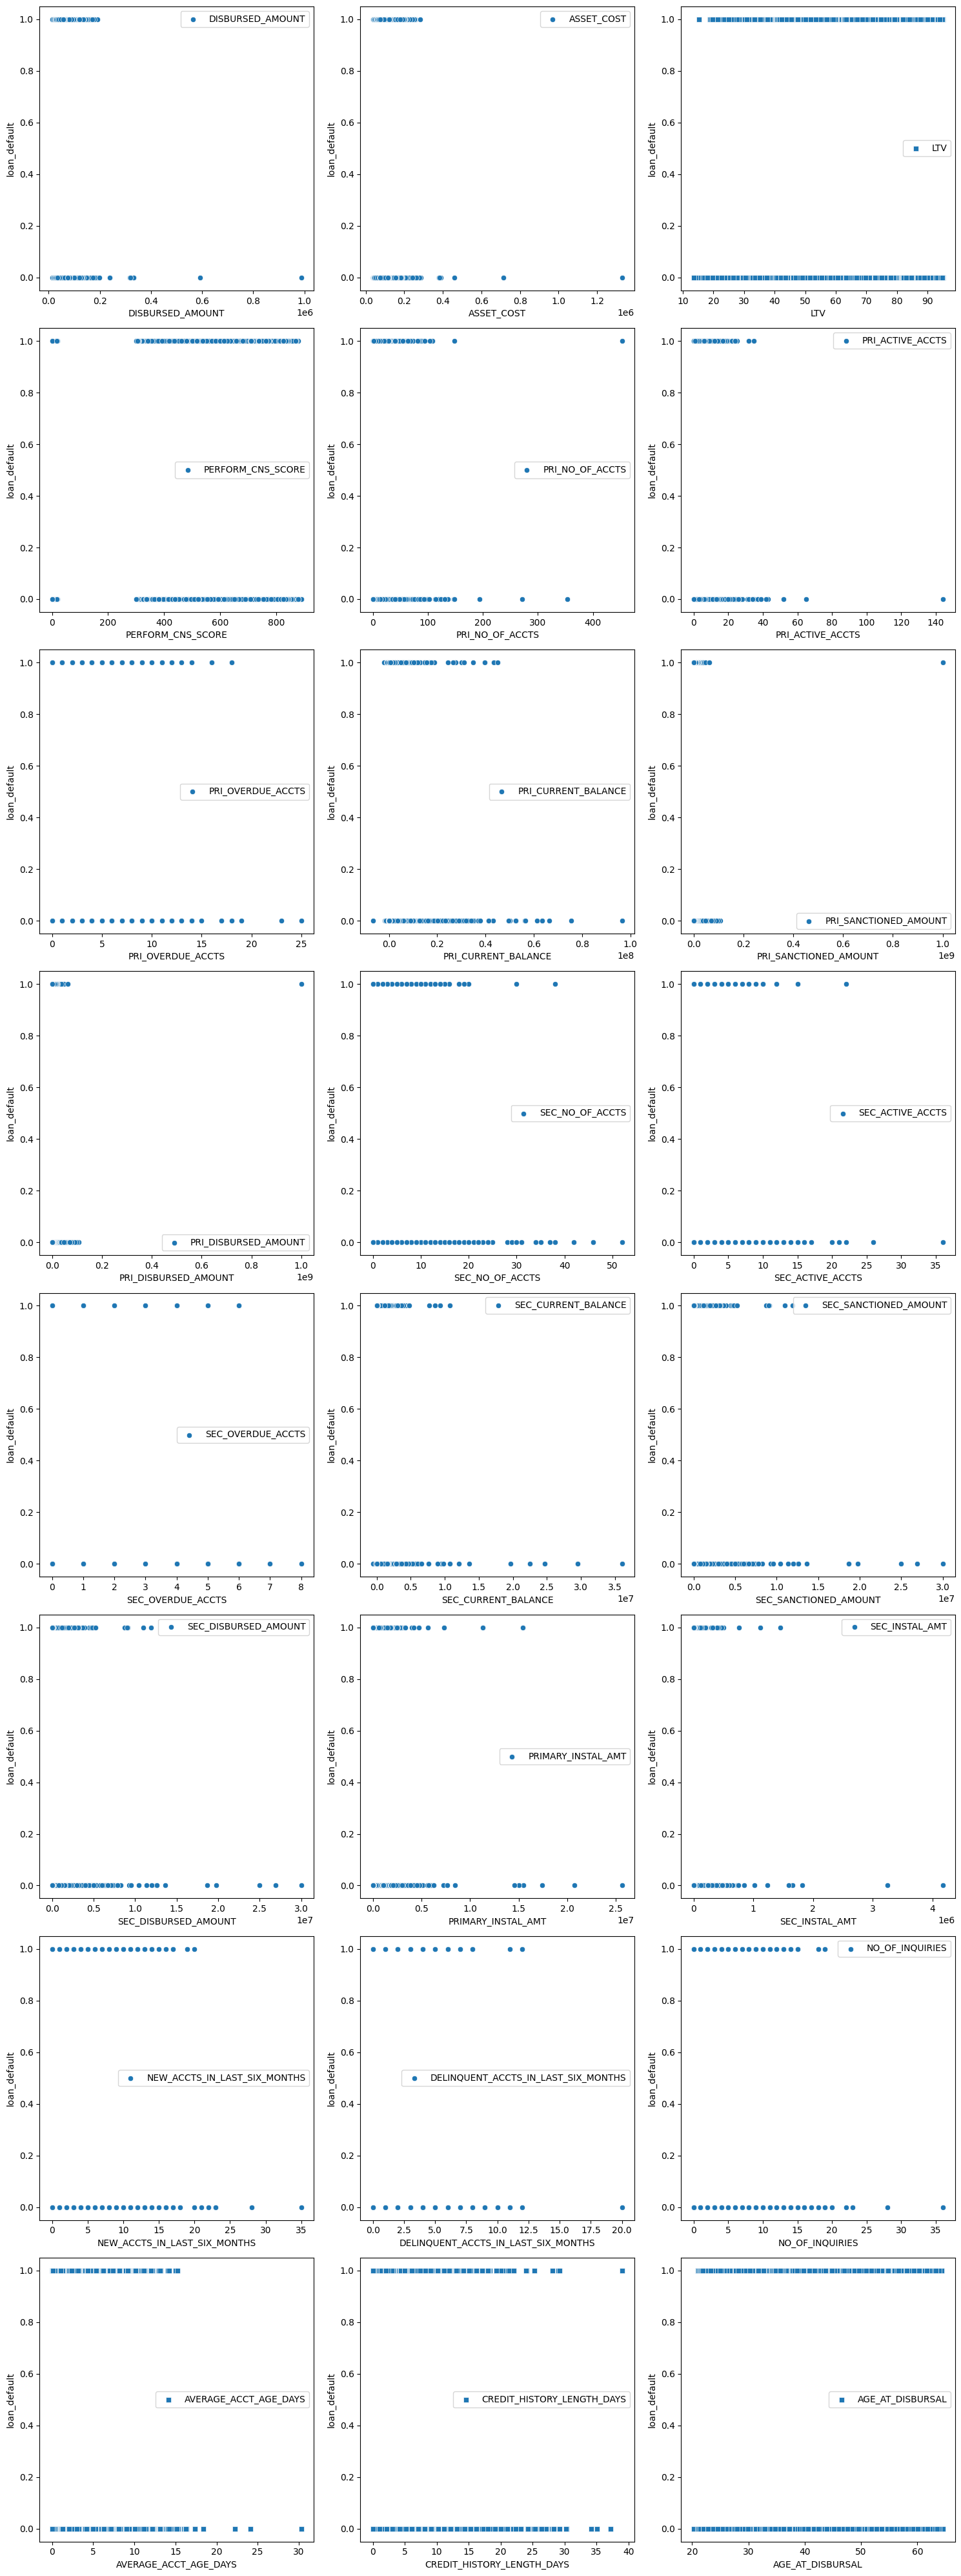

In [59]:
# List of attributes to plot
attributes = ['DISBURSED_AMOUNT', 'ASSET_COST', 'LTV',
              'PERFORM_CNS_SCORE', 'PRI_NO_OF_ACCTS', 'PRI_ACTIVE_ACCTS',
               'PRI_OVERDUE_ACCTS', 'PRI_CURRENT_BALANCE', 'PRI_SANCTIONED_AMOUNT',
               'PRI_DISBURSED_AMOUNT', 'SEC_NO_OF_ACCTS', 'SEC_ACTIVE_ACCTS',
               'SEC_OVERDUE_ACCTS', 'SEC_CURRENT_BALANCE', 'SEC_SANCTIONED_AMOUNT',
               'SEC_DISBURSED_AMOUNT', 'PRIMARY_INSTAL_AMT', 'SEC_INSTAL_AMT',
               'NEW_ACCTS_IN_LAST_SIX_MONTHS', 'DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS',
               'NO_OF_INQUIRIES',
               'AVERAGE_ACCT_AGE_DAYS', 'CREDIT_HISTORY_LENGTH_DAYS', 'AGE_AT_DISBURSAL',
]
print(len(attributes))
# Create subplots
# Calculate the number of rows and columns for subplots

n_rows = len(attributes) // 3
n_cols = 3
if len(attributes) % 3 != 0:
    n_rows += 1

# Create subplots
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(15, 5 * n_rows))

# Plot scatter plots in subplots
for idx, (attr, ax) in enumerate(zip(attributes, axes.flatten())):
    sns.scatterplot(data=df, x=attr, y='LOAN_DEFAULT', marker='o' if df[attr].dtype == int else 's', label=attr, ax=ax)
    ax.set_xlabel(attr)
    ax.set_ylabel('loan_default')
    ax.legend()

plt.tight_layout()
plt.show()

24


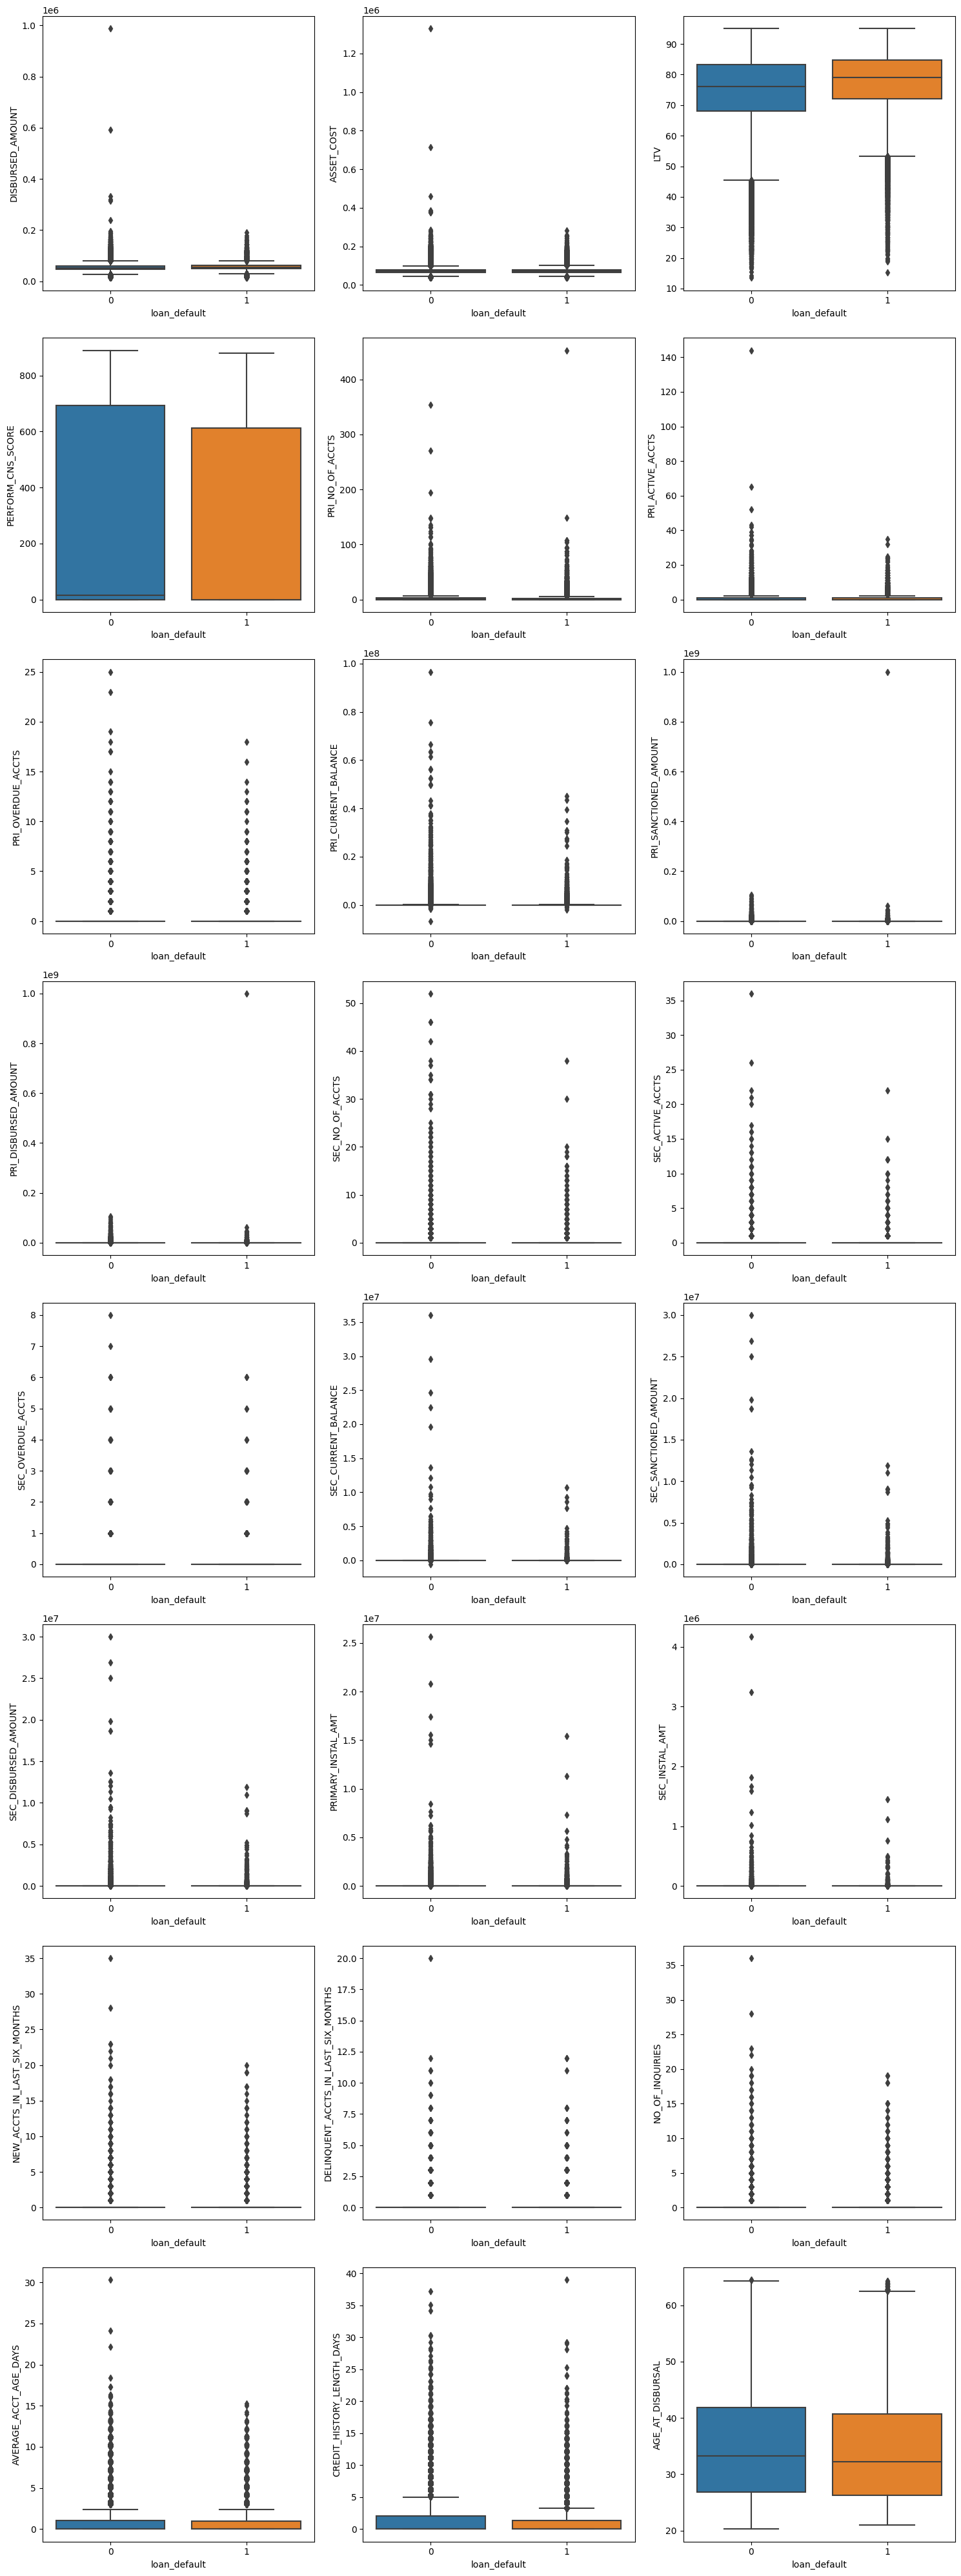

In [60]:
# List of attributes to plot
attributes = ['DISBURSED_AMOUNT', 'ASSET_COST', 'LTV',
              'PERFORM_CNS_SCORE', 'PRI_NO_OF_ACCTS', 'PRI_ACTIVE_ACCTS',
               'PRI_OVERDUE_ACCTS', 'PRI_CURRENT_BALANCE', 'PRI_SANCTIONED_AMOUNT',
               'PRI_DISBURSED_AMOUNT', 'SEC_NO_OF_ACCTS', 'SEC_ACTIVE_ACCTS',
               'SEC_OVERDUE_ACCTS', 'SEC_CURRENT_BALANCE', 'SEC_SANCTIONED_AMOUNT',
               'SEC_DISBURSED_AMOUNT', 'PRIMARY_INSTAL_AMT', 'SEC_INSTAL_AMT',
               'NEW_ACCTS_IN_LAST_SIX_MONTHS', 'DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS',
               'NO_OF_INQUIRIES',
               'AVERAGE_ACCT_AGE_DAYS', 'CREDIT_HISTORY_LENGTH_DAYS', 'AGE_AT_DISBURSAL',
]
print(len(attributes))
# Create subplots
# Calculate the number of rows and columns for subplots

n_rows = len(attributes) // 3
n_cols = 3
if len(attributes) % 3 != 0:
    n_rows += 1

#n_rows = 1
#n_cols = 3
# Create subplots
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(15, 5 * n_rows))

# Plot scatter plots in subplots
for idx, (attr, ax) in enumerate(zip(attributes, axes.flatten())):
    sns.boxplot(data=df, x='LOAN_DEFAULT', y=attr, ax=ax)
    ax.set_ylabel(attr)
    ax.set_xlabel('loan_default')
    #ax.legend(labels=['Non-Default', 'Default'])

plt.tight_layout()
plt.show()

## 4.2 EDA using visuals
* Use (minimum) 2 plots (pair plot, heat map, correlation plot, regression plot...) to identify the optimal set of attributes that can be used for classification.
* Name them, explain why you think they can be helpful in the task and perform the plot as well. Unless proper justification for the choice of plots given, no credit will be awarded.

Score: 2 Marks

In [61]:
##---------Type the code below this line------------------##

<Axes: >

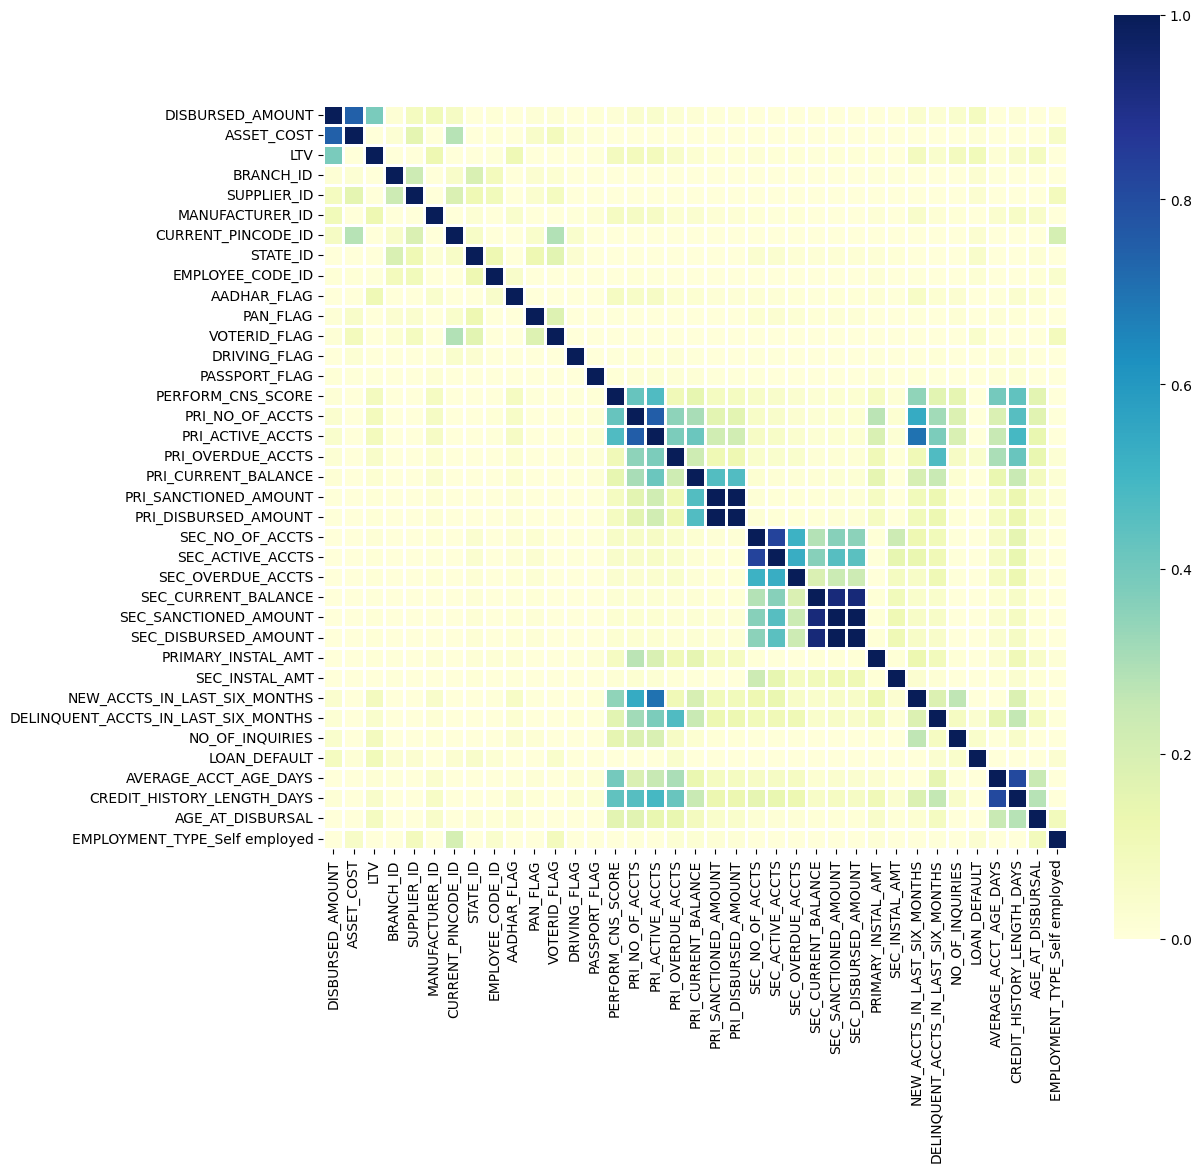

In [62]:
# heat map
plt.figure(figsize=(12, 12))
correlation = df.corr()
sns.heatmap(correlation, vmin=0, vmax=1, cmap="YlGnBu", linewidths=1, square=True)

In [63]:
length = len(correlation.index)
attr_to_plot = []
for i in range(length):
    for j in range(i):
        if abs(correlation[correlation.index[i]][correlation.index[j]])>0.7:
            print(f"{correlation.index[i]} -> {correlation.index[j]} = {correlation[correlation.index[i]][correlation.index[j]]}")
            attr_to_plot.append((correlation.index[i], correlation.index[j]))    

ASSET_COST -> DISBURSED_AMOUNT = 0.7460367785814683
VOTERID_FLAG -> AADHAR_FLAG = -0.868596610410297
PRI_ACTIVE_ACCTS -> PRI_NO_OF_ACCTS = 0.7528530778841469
PRI_DISBURSED_AMOUNT -> PRI_SANCTIONED_AMOUNT = 0.9987498713921027
SEC_ACTIVE_ACCTS -> SEC_NO_OF_ACCTS = 0.8290417768006805
SEC_SANCTIONED_AMOUNT -> SEC_CURRENT_BALANCE = 0.9290808368943826
SEC_DISBURSED_AMOUNT -> SEC_CURRENT_BALANCE = 0.9298791393586247
SEC_DISBURSED_AMOUNT -> SEC_SANCTIONED_AMOUNT = 0.9996501836755561
NEW_ACCTS_IN_LAST_SIX_MONTHS -> PRI_ACTIVE_ACCTS = 0.7013877188037907
CREDIT_HISTORY_LENGTH_DAYS -> AVERAGE_ACCT_AGE_DAYS = 0.8107567140087284


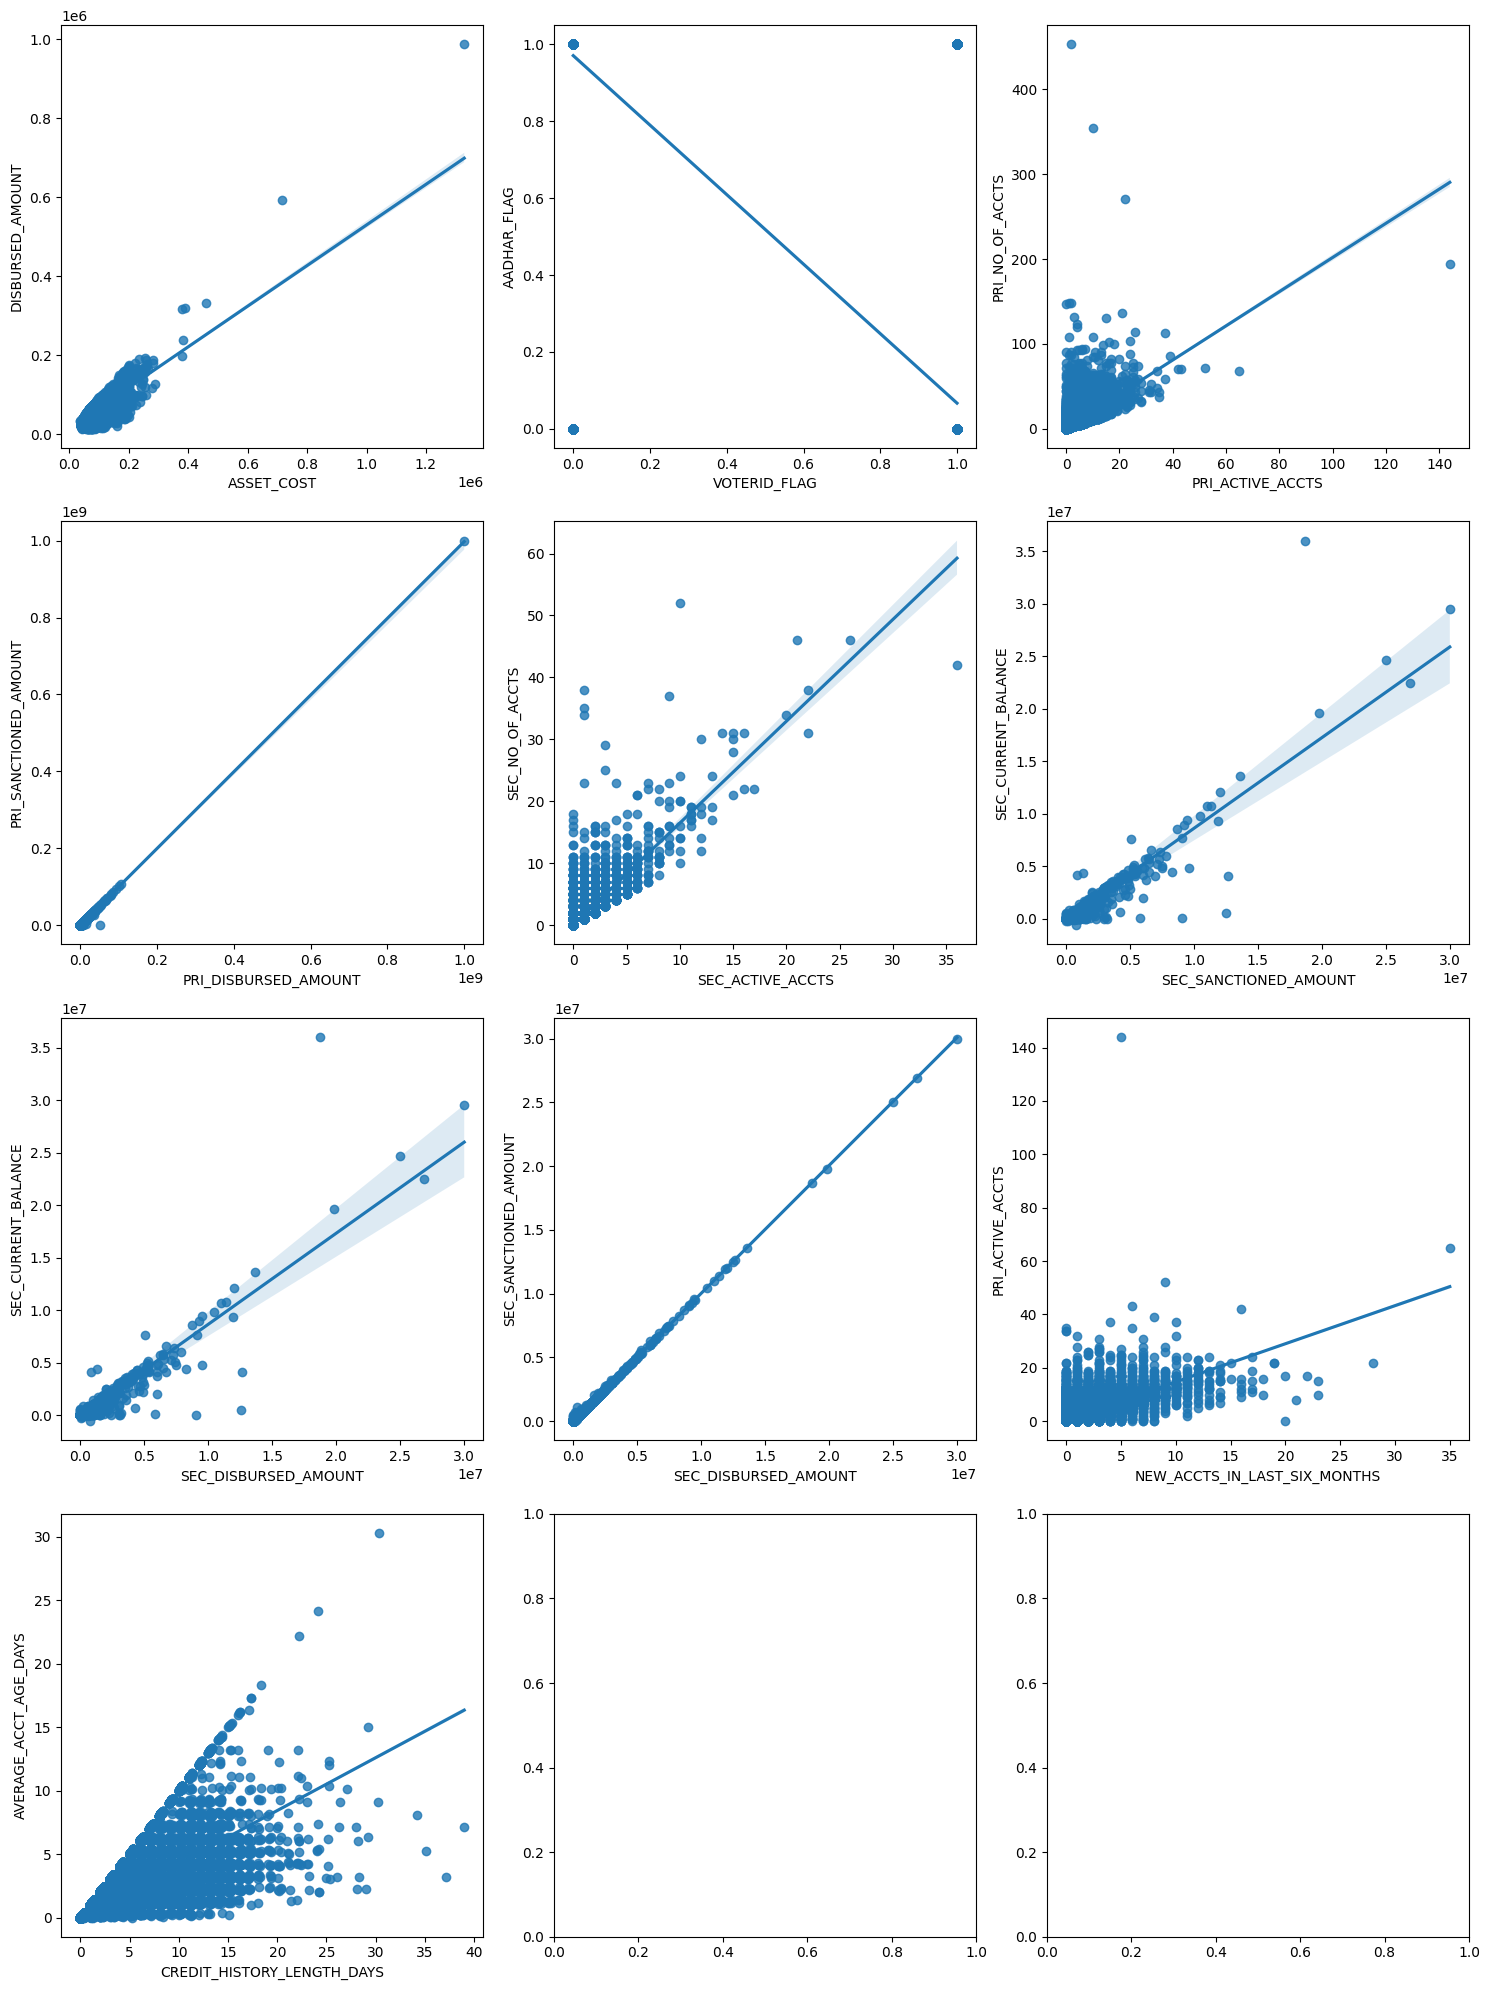

In [64]:
# regression plot.
n_rows = len(attr_to_plot) // 3
n_cols = 3
if len(attr_to_plot) % 3 != 0:
    n_rows += 1

# Create subplots
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(15, 5 * n_rows))

# Plot scatter plots in subplots
for idx, ((i, j), ax) in enumerate(zip(attr_to_plot, axes.flatten())):
    sns.regplot(data=df, x=i, y=j, ax=ax)
    ax.set_ylabel(j)
    ax.set_xlabel(i)
    #ax.legend(labels=['Non-Default', 'Default'])

plt.tight_layout()
plt.show()

**We can see high correlation for following attributes from the above plots (Correlation and regression plots).**

1. DISBURSED_AMOUNT, ASSET_COST
2. PRI_DISBURSED_AMOUNT, PRI_SANCTIONED_AMOUNT
3. SEC_SANCTIONED_AMOUNT, SEC_CURRENT_BALANCE, SEC_DISBURSED_AMOUNT
4. SEC_ACTIVE_ACCTS, SEC_NO_OF_ACCTS
5. CREDIT_HISTORY_LENGTH_DAYS, AVERAGE_ACCT_AGE

Justification of selecting above plots:

Correlation plot By visually examining the correlation plot, we can identify the degree and direction of correlation between pairs of features.

Regression plot will be helpfull in further analysis of results from the correlation plot, by plotting regression plot between each set of selected features sets.

we avoided pairplot because to plot between each set of attribues it is taking so much time.

We employed a correlation plot with a heat map to analyze the relationships between features and identify any strong correlations among them. This step helped us in pin-pointing related features so that we could retain only those that are unrelated when building our model.

Upon inspecting the correlation plot, we observed several pairs of features with a high correlation coefficient greater than 0.7. To delve deeper into these relationships, we used regression plots to visualize the connections between these highly correlated features.

Here are the pairs of features exhibiting high correlation:

1. DISBURSED_AMOUNT and ASSET_COST
2. PRI_DISBURSED_AMOUNT and PRI_SANCTIONED_AMOUNT
3. SEC_SANCTIONED_AMOUNT, SEC_CURRENT_BALANCE, and SEC_DISBURSED_AMOUNT
4. SEC_ACTIVE_ACCTS and SEC_NO_OF_ACCTS
5. CREDIT_HISTORY_LENGTH_DAYS and AVERAGE_ACCT_AGE

By identifying these highly correlated feature pairs, we gained valuable insights into our dataset's structure and dependencies. This information can guide us in making informed decisions about feature selection and engineering as we proceed with our modeling efforts.

# 5. Data Wrangling



## 5.1 Univariate Filters

#### Numerical and Categorical Data
* Identify top 5 significant features by evaluating each feature independently with respect to the target variable by exploring
1. Mutual Information (Information Gain)
2. Gini index
3. Gain Ratio
4. Chi-Squared test
5. Fisher Score
(From the above 5 you are required to use only any <b>two</b>)

#### For Text data

1. Stemming / Lemmatization.
2. Forming n-grams and storing them in the document vector.
3. TF-IDF
(From the above 2 you are required to use only any <b>two</b>)


Score: 3 Marks

In [65]:
##---------Type the code below this line------------------##

In [66]:
# mutual_information.
from sklearn.feature_selection import mutual_info_classif
import numpy as np

columns_req = ['DISBURSED_AMOUNT',  "ASSET_COST", 'LTV', 'BRANCH_ID', 'SUPPLIER_ID',
               'MANUFACTURER_ID', 'CURRENT_PINCODE_ID', 'STATE_ID', 'EMPLOYEE_CODE_ID',
               'AADHAR_FLAG', 'PAN_FLAG', 'VOTERID_FLAG', 'DRIVING_FLAG',
               'PASSPORT_FLAG', 'PERFORM_CNS_SCORE', 'PRI_NO_OF_ACCTS',
               'PRI_ACTIVE_ACCTS', 'PRI_OVERDUE_ACCTS', 'PRI_CURRENT_BALANCE',
               'PRI_SANCTIONED_AMOUNT', 'PRI_DISBURSED_AMOUNT', 'SEC_NO_OF_ACCTS',
               'SEC_ACTIVE_ACCTS', 'SEC_OVERDUE_ACCTS', 'SEC_CURRENT_BALANCE',
               'SEC_SANCTIONED_AMOUNT', 'SEC_DISBURSED_AMOUNT', 'PRIMARY_INSTAL_AMT',
               'SEC_INSTAL_AMT', 'NEW_ACCTS_IN_LAST_SIX_MONTHS',
               'DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS', 'NO_OF_INQUIRIES',
               'AVERAGE_ACCT_AGE_DAYS', 'CREDIT_HISTORY_LENGTH_DAYS',
               'AGE_AT_DISBURSAL', 'EMPLOYMENT_TYPE_Self employed']

X = df[columns_req]
y = df['LOAN_DEFAULT']

mi_scores = mutual_info_classif(X.to_numpy(), y.to_numpy())
importance = pd.Series(mi_scores, X.columns)

In [67]:
mi_top_features = np.argsort(mi_scores)[-10:]

mi_top_feature_names = X.columns[mi_top_features]

In [68]:
for name, score in zip(reversed(X.columns[mi_top_features]), reversed(mi_scores[mi_top_features])):
    print("{:} \t {: 20}".format(name, score))

AADHAR_FLAG 	  0.03109566941851738
EMPLOYMENT_TYPE_Self employed 	  0.027312491709416298
EMPLOYEE_CODE_ID 	  0.01548129732886716
CURRENT_PINCODE_ID 	  0.01240792770435828
SUPPLIER_ID 	  0.012391253301027971
MANUFACTURER_ID 	  0.010638814586267253
DISBURSED_AMOUNT 	  0.009254486443925902
LTV 	  0.007903362367600586
PERFORM_CNS_SCORE 	  0.007893513905228966
STATE_ID 	  0.005689235429414019


<Axes: >

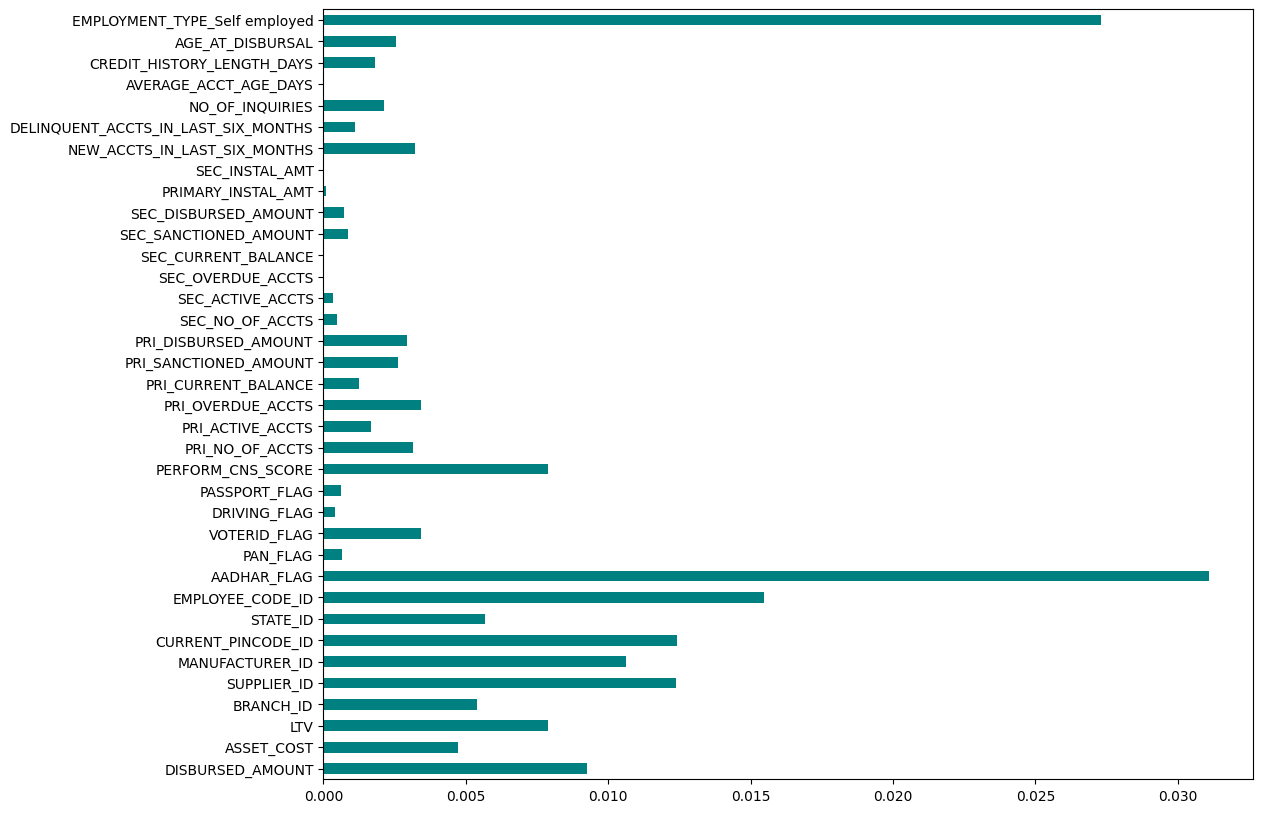

In [69]:
plt.figure(figsize=(12, 10))
importance.plot(kind="barh", color='teal')

In [70]:
# chi squared 

In [71]:
X.columns

Index(['DISBURSED_AMOUNT', 'ASSET_COST', 'LTV', 'BRANCH_ID', 'SUPPLIER_ID',
       'MANUFACTURER_ID', 'CURRENT_PINCODE_ID', 'STATE_ID', 'EMPLOYEE_CODE_ID',
       'AADHAR_FLAG', 'PAN_FLAG', 'VOTERID_FLAG', 'DRIVING_FLAG',
       'PASSPORT_FLAG', 'PERFORM_CNS_SCORE', 'PRI_NO_OF_ACCTS',
       'PRI_ACTIVE_ACCTS', 'PRI_OVERDUE_ACCTS', 'PRI_CURRENT_BALANCE',
       'PRI_SANCTIONED_AMOUNT', 'PRI_DISBURSED_AMOUNT', 'SEC_NO_OF_ACCTS',
       'SEC_ACTIVE_ACCTS', 'SEC_OVERDUE_ACCTS', 'SEC_CURRENT_BALANCE',
       'SEC_SANCTIONED_AMOUNT', 'SEC_DISBURSED_AMOUNT', 'PRIMARY_INSTAL_AMT',
       'SEC_INSTAL_AMT', 'NEW_ACCTS_IN_LAST_SIX_MONTHS',
       'DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS', 'NO_OF_INQUIRIES',
       'AVERAGE_ACCT_AGE_DAYS', 'CREDIT_HISTORY_LENGTH_DAYS',
       'AGE_AT_DISBURSAL', 'EMPLOYMENT_TYPE_Self employed'],
      dtype='object')

In [72]:
# chi squared 
import pandas as pd
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

To_test = [
       'BRANCH_ID', 'SUPPLIER_ID',
       'MANUFACTURER_ID', 'CURRENT_PINCODE_ID', 'STATE_ID', 'EMPLOYEE_CODE_ID',
       'AADHAR_FLAG', 'PAN_FLAG', 'VOTERID_FLAG', 'DRIVING_FLAG',
       'PASSPORT_FLAG', 'EMPLOYMENT_TYPE_Self employed'
]


XX = df[To_test]
# Apply the Chi-Squared test
num_features_to_select = 5  # Number of top features you want to select
chi2_selector = SelectKBest(score_func=chi2, k=num_features_to_select)
X_new = chi2_selector.fit_transform(XX, y)

# Get the selected feature indices
selected_feature_indices = chi2_selector.get_support(indices=True)

# Get the names of selected features
selected_feature_names = XX.columns[selected_feature_indices]

print("Top", num_features_to_select, "features based on Chi-Squared test:")
print(selected_feature_names)

Top 5 features based on Chi-Squared test:
Index(['BRANCH_ID', 'SUPPLIER_ID', 'CURRENT_PINCODE_ID', 'STATE_ID',
       'EMPLOYEE_CODE_ID'],
      dtype='object')


In [73]:
selected_feature_names = XX.columns[selected_feature_indices]
chi2_scores = chi2_selector.scores_[selected_feature_indices]

for name, score in sorted(zip(selected_feature_names, chi2_scores), key=lambda x: x[1], reverse=True):
    print("{:<10}".format(name), "\t", score)

CURRENT_PINCODE_ID 	 301698.14651570213
SUPPLIER_ID 	 106506.15374351955
EMPLOYEE_CODE_ID 	 60482.81749016674
BRANCH_ID  	 14072.485908652916
STATE_ID   	 1551.0467526599255


<Axes: >

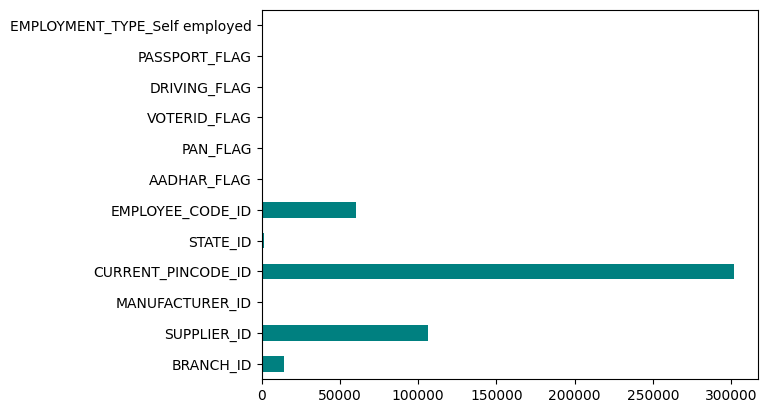

In [74]:
chi_importance = pd.Series(chi2_selector.scores_, XX.columns)
chi_importance.plot(kind="barh", color="teal")

<Axes: >

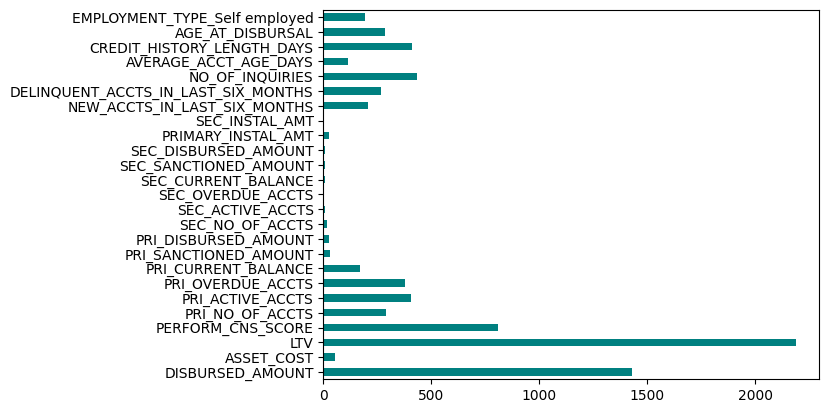

In [75]:
# fisher score
from sklearn.feature_selection import SelectKBest, f_classif

columns_req = [
       'DISBURSED_AMOUNT', 'ASSET_COST', 'LTV', 'PERFORM_CNS_SCORE', 'PRI_NO_OF_ACCTS',
       'PRI_ACTIVE_ACCTS', 'PRI_OVERDUE_ACCTS', 'PRI_CURRENT_BALANCE',
       'PRI_SANCTIONED_AMOUNT', 'PRI_DISBURSED_AMOUNT', 'SEC_NO_OF_ACCTS',
       'SEC_ACTIVE_ACCTS', 'SEC_OVERDUE_ACCTS', 'SEC_CURRENT_BALANCE',
       'SEC_SANCTIONED_AMOUNT', 'SEC_DISBURSED_AMOUNT', 'PRIMARY_INSTAL_AMT',
       'SEC_INSTAL_AMT', 'NEW_ACCTS_IN_LAST_SIX_MONTHS',
       'DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS', 'NO_OF_INQUIRIES',
       'AVERAGE_ACCT_AGE_DAYS', 'CREDIT_HISTORY_LENGTH_DAYS',
       'AGE_AT_DISBURSAL', 'EMPLOYMENT_TYPE_Self employed'
]

X = df[columns_req]
y = df['LOAN_DEFAULT']


# X: Feature matrix, y: Target variable
num_features_to_select = 15  # Choose the number of top features to select
fisher_selector = SelectKBest(score_func=f_classif, k=num_features_to_select)
fisher_selector.fit(X, y)

# Get the selected feature indices and their corresponding scores
selected_feature_indices = fisher_selector.get_support(indices=True)
fisher_scores = fisher_selector.scores_

# Create a DataFrame with column names and scores
#feature_scores_df = pd.DataFrame({'Feature': X.columns, 'Fisher_Score': fisher_scores})
importance = pd.Series(fisher_selector.scores_, X.columns)

#Sort the DataFrame by Fisher Scores in descending order
feature_scores_df = pd.DataFrame({'Feature': X.columns, 'Fisher_Score': fisher_scores})
feature_scores_df = feature_scores_df.sort_values(by='Fisher_Score', ascending=False)

# Print the top 5 features
#top_features = feature_scores_df#.head()
#print(top_features)
importance.plot(kind='barh', color="teal")

In [76]:
feature_scores_df.head()

,Feature,Fisher_Score
2,LTV,2186.428503
0,DISBURSED_AMOUNT,1426.461439
3,PERFORM_CNS_SCORE,807.353769
20,NO_OF_INQUIRIES,434.292291
22,CREDIT_HISTORY_LENGTH_DAYS,410.637710


## 5.2 Report observations

Write your observations from the results of each method. Clearly justify your choice of the method.

Score 1 mark

In [74]:
##---------Type the code below this line------------------##

The results from our data wrangling process reveal valuable insights for feature selection. We have identified five attributes that show a strong relationship with the `LOAD_DEFAULT` label, which can be categorized into two types:

As we know chi squared test is for categorical features and categorical labels,

**Categorical attributes:**
1. CURRENT_PINCODE_ID - Chi-squared score: 301698.15
2. SUPPLIER_ID - Chi-squared score: 106506.15
3. EMPLOYEE_CODE_ID - Chi-squared score: 60482.82
4. BRANCH_ID - Chi-squared score: 14072.485908652916
5. STATE_ID - Chi-squared score: 1551.0467526599255

Fisher score are for continuous features and categorical labels. we choose these measures out of 5.

**Continuous attributes:**
1. LTV - Fisher score: 2389.38
2. DISBURSED_AMOUNT - Fisher score: 1820.52
3. PERFORM_CNS_SCORE - Fisher score:807.353769
4. NO_OF_INQUIRIES - Fisher score:	434.292291
5. CREDIT_HISTORY_LENGTH_DAYS - Fisher score: 410.637710

We choose these measures out of five available options, considering their relevance to the problem at hand. These five attributes are promising candidates for modeling, and we intend to include them while removing others.

Additionally, it's worth noting that there is no significant correlation observed among these selected attributes. This lack of correlation can help improve the model's performance.

Furthermore, we have also noted that these attributes exhibit a high score in terms of mutual information gain, reinforcing our belief that these five attributes are well-suited for modeling purposes. This holistic evaluation supports our decision to include these attributes in our modeling process.

# 6. Implement Machine Learning Techniques

Use any 2 ML algorithms
1. Classification -- Decision Tree classifier

2. Clustering -- kmeans

3. Association Analysis

4. Anomaly detection

5. Textual data -- Naive Bayes classifier (not taught in this course)

A clear justification have to be given for why a certain algorithm was chosen to address your problem.

Score: 4 Marks (2 marks each for each algorithm)

## 6.1 ML technique 1 + Justification

In [77]:
##---------Type the code below this line------------------##
# We can see that LOAN_DEFAULT Values counts are not same.
df.LOAN_DEFAULT.value_counts()

LOAN_DEFAULT
0    176526
1     48967
Name: count, dtype: int64

In [78]:
df.columns

Index(['DISBURSED_AMOUNT', 'ASSET_COST', 'LTV', 'BRANCH_ID', 'SUPPLIER_ID',
       'MANUFACTURER_ID', 'CURRENT_PINCODE_ID', 'STATE_ID', 'EMPLOYEE_CODE_ID',
       'AADHAR_FLAG', 'PAN_FLAG', 'VOTERID_FLAG', 'DRIVING_FLAG',
       'PASSPORT_FLAG', 'PERFORM_CNS_SCORE', 'PRI_NO_OF_ACCTS',
       'PRI_ACTIVE_ACCTS', 'PRI_OVERDUE_ACCTS', 'PRI_CURRENT_BALANCE',
       'PRI_SANCTIONED_AMOUNT', 'PRI_DISBURSED_AMOUNT', 'SEC_NO_OF_ACCTS',
       'SEC_ACTIVE_ACCTS', 'SEC_OVERDUE_ACCTS', 'SEC_CURRENT_BALANCE',
       'SEC_SANCTIONED_AMOUNT', 'SEC_DISBURSED_AMOUNT', 'PRIMARY_INSTAL_AMT',
       'SEC_INSTAL_AMT', 'NEW_ACCTS_IN_LAST_SIX_MONTHS',
       'DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS', 'NO_OF_INQUIRIES',
       'LOAN_DEFAULT', 'AVERAGE_ACCT_AGE_DAYS', 'CREDIT_HISTORY_LENGTH_DAYS',
       'AGE_AT_DISBURSAL', 'EMPLOYMENT_TYPE_Self employed'],
      dtype='object')

**We can see high correlation for.**

1. DISBURSED_AMOUNT, ASSET_COST
2. PRI_DISBURSED_AMOUNT, PRI_SANCTIONED_AMOUNT
3. SEC_SANCTIONED_AMOUNT, SEC_CURRENT_BALANCE, SEC_DISBURSED_AMOUNT
4. SEC_ACTIVE_ACCTS, SEC_NO_OF_ACCTS
5. CREDIT_HISTORY_LENGTH_DAYS, AVERAGE_ACCT_AGE

In [79]:
# These are the Selected.
attr_to_train = [
    "LTV",
    "DISBURSED_AMOUNT",
    'EMPLOYEE_CODE_ID',
    'CURRENT_PINCODE_ID',
    'SUPPLIER_ID'
]

In [80]:
def removeOutlier(dataSet, feature):    
    q1=dataSet[feature].quantile(0.25)
    q3=dataSet[feature].quantile(0.75)
    IQR=q3-q1
    lowerLimit = q1 - 1.5 * IQR
    UpperLimit = q3 + 1.5 * IQR 
    dataSet = dataSet[dataSet[feature]< UpperLimit]
    dataSet = dataSet[dataSet[feature]> lowerLimit]
    return dataSet
train = removeOutlier(df, "DISBURSED_AMOUNT")
train = removeOutlier(train, "LTV")

In [81]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score
from sklearn.utils import resample
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, auc, roc_curve, roc_auc_score, balanced_accuracy_score, classification_report

df_majority = train[train['LOAN_DEFAULT']==0]
df_minority = train[train['LOAN_DEFAULT']==1]

df_minority_upsampled = resample(df_minority, 
                                 replace=True,                  # sample with replacement
                                 n_samples=len(df_majority),    # to match majority class
                                 random_state=123)              # reproducible results

train_df = pd.concat([df_majority, df_minority_upsampled])

X = train_df[attr_to_train].to_numpy()
y = train_df['LOAN_DEFAULT'].to_numpy()

# Split the data into train and test sets
X_train, X_test_1, y_train, y_test_1 = train_test_split(X, y, test_size=0.2, random_state=42) 

In [82]:
# Decision Tree Classifier Hyperparameter tuning.
from sklearn.model_selection import GridSearchCV

clf = DecisionTreeClassifier(random_state=123)

params =  {
    "max_depth": list(range(50, 55)),
    "criterion": ['gini', "entropy", "log_loss"]
}

grid = GridSearchCV(estimator=clf,
                    param_grid=params,
                    cv=5,
                    n_jobs=1,
                    verbose=1)

grid.fit(X_train, y_train)
grid.best_score_, grid.best_params_

# Initialize and train a Decision Tree Classifier
tree_model = DecisionTreeClassifier(**grid.best_params_, random_state=42)
tree_model.fit(X_train, y_train)

# Predict on the test set
y_pred_model_1 = tree_model.predict(X_test_1)

# Predict probabilities on the test set
y_prob_model_1 = tree_model.predict_proba(X_test_1)[:, 1]

# Evaluate the model
accuracy = accuracy_score(y_test_1, y_pred_model_1)
f1 = f1_score(y_test_1, y_pred_model_1)
conf_matrix = confusion_matrix(y_test_1, y_pred_model_1)
class_report = classification_report(y_test_1, y_pred_model_1)

# Print the evaluation metrics
print("Accuracy:", accuracy)
print("F1 Score:", f1)
print("\nConfusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", class_report)

Fitting 5 folds for each of 15 candidates, totalling 75 fits
Accuracy: 0.8570021815537511
F1 Score: 0.8696648762099392

Confusion Matrix:
 [[25078  7962]
 [ 1477 31491]]

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.76      0.84     33040
           1       0.80      0.96      0.87     32968

    accuracy                           0.86     66008
   macro avg       0.87      0.86      0.86     66008
weighted avg       0.87      0.86      0.86     66008



<Axes: >

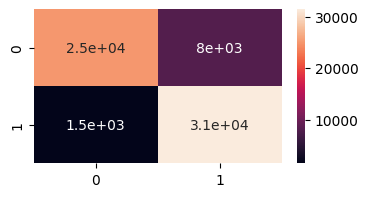

In [83]:
plt.figure(figsize=(4,2))
sns.heatmap(conf_matrix, annot=True)

## 6.2 ML technique 2 + Justification

In [ ]:
##---------Type the code below this line------------------##

In [84]:
from sklearn.cluster import KMeans
from sklearn.preprocessing  import MinMaxScaler
from scipy.spatial.distance import cdist
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV

# Scalingt the features.
X = train[attr_to_train].to_numpy()
y = train['LOAN_DEFAULT'].to_numpy()

for i in range(X.shape[1]):
    scaler = MinMaxScaler()
    X[:, i:i+1] = scaler.fit_transform(X[:, i:i+1])

X_train, X_test_2, y_train, y_test_2 = train_test_split(X, y, test_size=0.2, random_state=42)

# Hyperparameter tune.
clf = KMeans(n_clusters=2, random_state=42)

params =  {
    "init" : ['k-means++', 'random'],
    "n_init": [2,4,6,8,10,12,14],
    "algorithm" : ["lloyd", "elkan", "auto", "full"]
}

grid = GridSearchCV(estimator=clf,
                    param_grid=params,
                    cv=5,
                    n_jobs=1,
                    verbose=1)

grid.fit(X_train, y_train)

model = KMeans(n_clusters=2, random_state=42, **grid.best_params_)

model.fit(X_train)

distance = cdist(X_test_2, model.cluster_centers_)
min_distance = np.min(distance, axis=1)
threshold = np.percentile(min_distance, 99)
y_pred_model_2 = (min_distance < threshold).astype(int)

Fitting 5 folds for each of 56 candidates, totalling 280 fits


In [85]:
accuracy = accuracy_score(y_test_2, y_pred_model_2)
precision = precision_score(y_test_2, y_pred_model_2)
recall = recall_score(y_test_2, y_pred_model_2)
f1 = f1_score(y_test_2, y_pred_model_2)
conf_matrix = confusion_matrix(y_test_2, y_pred_model_2)
class_report = classification_report(y_test_2, y_pred_model_2)

# Print the evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1:", f1)
print("\nConfusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", class_report)

Accuracy: 0.22376298539955986
Precision: 0.2171335691748733
Recall: 0.9944170771756978
F1: 0.35643797453453924

Confusion Matrix:
 [[  372 32752]
 [   51  9084]]

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.01      0.02     33124
           1       0.22      0.99      0.36      9135

    accuracy                           0.22     42259
   macro avg       0.55      0.50      0.19     42259
weighted avg       0.74      0.22      0.09     42259



<Axes: >

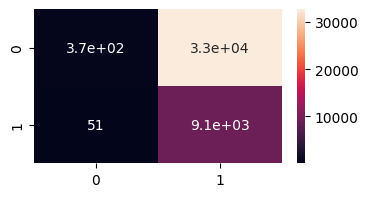

In [86]:
plt.figure(figsize=(4,2))
sns.heatmap(conf_matrix, annot=True)

Firstly, as suggested, we considered using a Decision Tree Classifier for our task. In the previous sections, we identified five attributes that are more suitable for our objective. To improve data quality, we decided to remove outliers from both the columns of DISBURSED_AMOUNT and LTV, which are continuous variables.

Upon analyzing our dataset, we observed that there were more 0's than 1's in the target variable. To address this class imbalance issue, we performed resampling to make both classes approximately equal in size.

We chose the Decision Tree Classifier because our dataset includes three types of categorical features out of the five identified attributes. Decision trees are known to perform well when dealing with categorical values, making it a suitable choice for our problem.

Next, we divided the dataset into a train-test split and conducted hyperparameter optimization. Using the best parameters obtained from this process, we trained the Decision Tree Classifier model and reported its performance scores.

For our second model, we also performed hyperparameter optimization. With the best parameters in hand, we implemented the K-Means clustering algorithm. We have considered the n_clusters value in KMeans as 2, which best suited problem statement.

## 7. Conclusion

Compare the performance of the ML techniques used.

Derive values for preformance study metrics like accuracy, precision, recall, F1 Score, AUC-ROC etc to compare the ML algos and plot them. A proper comparision based on different metrics should be done and not just accuracy alone, only then the comparision becomes authentic. You may use Confusion matrix, classification report, Word cloud etc as per the requirement of your application/problem.

Score 1 Mark

In [ ]:
##---------Type the code below this line------------------##

In [87]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

In [88]:
# we have y_test, y_pred_model_1, y_pred_model_2
# Evaluate the classifier
accuracy = accuracy_score(y_test_1, y_pred_model_1)
precision = precision_score(y_test_1, y_pred_model_1)
recall = recall_score(y_test_1, y_pred_model_1)
f1 = f1_score(y_test_1, y_pred_model_1)
conf_matrix = confusion_matrix(y_test_1, y_pred_model_1)
class_report = classification_report(y_test_1, y_pred_model_1)

# Print the evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1:", f1)
print("\nConfusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", class_report)

Accuracy: 0.8570021815537511
Precision: 0.7981902516918865
Recall: 0.9551989808298956
F1: 0.8696648762099392

Confusion Matrix:
 [[25078  7962]
 [ 1477 31491]]

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.76      0.84     33040
           1       0.80      0.96      0.87     32968

    accuracy                           0.86     66008
   macro avg       0.87      0.86      0.86     66008
weighted avg       0.87      0.86      0.86     66008



In [89]:
# Evaluate the classifier
accuracy = accuracy_score(y_test_2, y_pred_model_2)
precision = precision_score(y_test_2, y_pred_model_2)
recall = recall_score(y_test_2, y_pred_model_2)
f1 = f1_score(y_test_2, y_pred_model_2)
conf_matrix = confusion_matrix(y_test_2, y_pred_model_2)
class_report = classification_report(y_test_2, y_pred_model_2)

# Print the evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1:", f1)
print("\nConfusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", class_report)

Accuracy: 0.22376298539955986
Precision: 0.2171335691748733
Recall: 0.9944170771756978
F1: 0.35643797453453924

Confusion Matrix:
 [[  372 32752]
 [   51  9084]]

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.01      0.02     33124
           1       0.22      0.99      0.36      9135

    accuracy                           0.22     42259
   macro avg       0.55      0.50      0.19     42259
weighted avg       0.74      0.22      0.09     42259



From the scores of Accuracy, precision, recall, f1_score etc 

**Metrics from Decision Tree:**
    
    Accuracy: 0.8570021815537511
    Precision: 0.7981902516918865
    Recall: 0.9551989808298956
    F1: 0.8696648762099392

**Metrics from KMeans:**
    
    Accuracy: 0.22376298539955986
    Precision: 0.2171335691748733
    Recall: 0.9944170771756978
    F1: 0.35643797453453924

From the above observations we can conclude that Decisiontree model performed well in almost all metrics so we choose decisiontree model as our final model.

## 8. Solution

What is the solution that is proposed to solve the business problem discussed in Section 1. Also share your learnings while working through solving the problem in terms of challenges, observations, decisions made etc.

Score 2 Marks

**Introduction**

We initially addressed the challenge of predicting loan repayment behavior by employing a decision tree model based on five key attributes. Our primary goal was to forecast whether loan recipients would default on their loans, thereby mitigating the risk of financial losses resulting from default cases.

**Solution Approach including the Observations, Challenges and Decisions made.**

Our process began with searching for relevant datasets on platforms like Kaggle. After selecting a suitable dataset and downloading it, we proceeded to examine its characteristics, including the number of columns, rows, and their respective names. We computed statistical summaries for continuous attributes, identified and resolved issues like duplicate entries, missing values, and data inconsistencies. Notably, there were no duplicates, and the missing values only affected about 3% of the dataset. As for missing values in the "EMPLOYMENT_TYPE" attribute, we opted to eliminate rows with such missing data, given the absence of discernible relationships for imputation.

We addressed date-related columns like "DISBURSAL_DATE" and "DATE_OF_BIRTH," converting them from object to datetime format. The "PERFORM_CNS_SCORE_DESCRIPTION" column had significant missing values, prompting us to exclude it from our analysis. We also recognized that "AVERAGE_ACCT_AGE" and "CREDIT_HISTORY_LENGTH" were intended to represent years and months but were not formatted properly. We rectified this by applying string processing to establish the correct year format. Another step involved removing the "MOBILENO_AVL_FLAG" column, as it provided no meaningful input for modeling purposes.

Additionally, we devised a new feature, "AGE_AT_DISBURSAL," calculated from the "DATE_OF_BIRTH" and "DISBURSAL_DATE" columns, indicating the loan recipient's age at the time of loan disbursal. Consequently, we removed the redundant "AGE_AT_DISBURSAL" derived from "DATE_OF_BIRTH."

Subsequently, categorical column "EMPLOYMENT_TYPE" underwent one-hot encoding to facilitate compatibility with models. While we identified other categorical columns like "BRANCH_ID," "SUPPLIER_ID," "MANUFACTURER_ID," "CURRENT_PINCODE_ID," "STATE_ID," and "EMPLOYEE_CODE_ID," they had numerous categories and were already label-encoded, so we retained their existing format.

Progressing to feature identification, we discerned the attributes that would serve as features and labels for our analysis. Subsequent sections involved data visualization using seaborn library, featuring scatter plots of attributes against labels, and box plots portraying attribute distribution concerning labels.

We examined correlations through heat maps, uncovering substantial correlations within "PRI_" and "SEC_" attributes. We pinpointed high correlations by filtering attributes with an absolute correlation greater than 0.7 and gained further insights through regression plots. Notably, we identified correlations between:

DISBURSED_AMOUNT and ASSET_COST
PRI_DISBURSED_AMOUNT and PRI_SANCTIONED_AMOUNT
SEC_SANCTIONED_AMOUNT, SEC_CURRENT_BALANCE, and SEC_DISBURSED_AMOUNT
SEC_ACTIVE_ACCTS and SEC_NO_OF_ACCTS
CREDIT_HISTORY_LENGTH_DAYS and AVERAGE_ACCT_AGE
Considering these correlations, we realized that including DISBURSED_AMOUNT would render ASSET_COST redundant, and similar considerations applied to other correlated attributes.

In the subsequent section, we assessed attribute importance for predicting the target label using measures like chi-squared test, Fisher score, and mutual information gain. We isolated significant attributes such as LTV, DISBURSED_AMOUNT, EMPLOYEE_CODE_ID, CURRENT_PINCODE_ID, and SUPPLIER_ID based on these analyses.

Moving on, we embarked on the modeling phase. To minimize potential outliers' impact, we removed outliers from continuous attributes like DISBURSED_AMOUNT and LTV, even though decision trees are relatively resilient to outliers. Addressing class imbalance, we employed resampling techniques to achieve a balanced distribution of 1's and 0's in the labels. Our dataset was then divided into training and testing subsets, followed by hyperparameter optimization. Utilizing the best parameters, we constructed the final decision tree model, attaining an accuracy of approximately 0.85.

For an alternative modeling approach, we explored KMeans clustering. Here, we incorporated feature scaling using MinMaxScaler, conducted train-test splitting, pursued hyperparameter optimization, and eventually built the model using the optimal parameters. Regrettably, the accuracy on the test data proved to be notably low compared to the decision tree model.

Finally, we evaluated the models' performance using various metrics such as accuracy, precision, recall, and F1-score. Upon comprehensive analysis, the decision tree model consistently outperformed the KMeans model across multiple metrics. Consequently, we confidently selected the decision tree model as the final choice for this particular dataset, given its superior performance in the evaluation metrics.